<a href="https://colab.research.google.com/github/adrinorosario/pytorch-notebooks/blob/main/02_neural_network_classification_with_pytorch.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Neural Network Classification with PyTorch

## 1. Make classification data and get it ready

In [ ]:
import sklearn
from sklearn.datasets import make_circles

In [ ]:
# Make 1000 samples
n_samples = 1000

# Create circles
X, y = make_circles(n_samples,
                    noise=0.03,
                    random_state=42)

In [ ]:
len(X), len(y), type(X), type(y)

(1000, 1000, numpy.ndarray, numpy.ndarray)

In [ ]:
print(f"First 5 samples of X:\n {X[:5]}\n")
print(f"First 5 samples of y:\n {y[:5]}")

First 5 samples of X:
 [[ 0.75424625  0.23148074]
 [-0.75615888  0.15325888]
 [-0.81539193  0.17328203]
 [-0.39373073  0.69288277]
 [ 0.44220765 -0.89672343]]

First 5 samples of y:
 [1 1 1 1 0]


In [ ]:
for i in range(0, 5):
  print(f"Sample: {X[i]} Label: {y[i]}")

Sample: [0.75424625 0.23148074] Label: 1
Sample: [-0.75615888  0.15325888] Label: 1
Sample: [-0.81539193  0.17328203] Label: 1
Sample: [-0.39373073  0.69288277] Label: 1
Sample: [ 0.44220765 -0.89672343] Label: 0


In [ ]:
X

array([[ 0.75424625,  0.23148074],
       [-0.75615888,  0.15325888],
       [-0.81539193,  0.17328203],
       ...,
       [-0.13690036, -0.81001183],
       [ 0.67036156, -0.76750154],
       [ 0.28105665,  0.96382443]])

In [ ]:
# Make dataframe of circle data
import pandas as pd

circles = pd.DataFrame({"X1": X[:, 0],
                        "X2": X[:, 1],
                        "label": y})

circles.head(10)

,X1,X2,label
0,0.754246,0.231481,1
1,-0.756159,0.153259,1
2,-0.815392,0.173282,1
3,-0.393731,0.692883,1
4,0.442208,-0.896723,0
5,-0.479646,0.676435,1
6,-0.013648,0.803349,1
7,0.771513,0.147760,1
8,-0.169322,-0.793456,1
9,-0.121486,1.021509,0


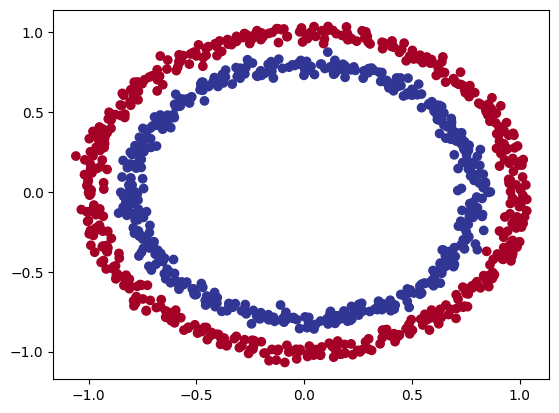

In [ ]:
# Visualize
import matplotlib.pyplot as plt

plt.scatter(x=X[:, 0],
            y=X[:, 1],
            c=y,
            cmap=plt.cm.RdYlBu)

**Note**: The data we're working with is a small dataset which is small enough to experiment on and sizeable enough to practice the fundamentals on

In [ ]:
X.shape, y.shape, type(X), type(y)

((1000, 2), (1000,), numpy.ndarray, numpy.ndarray)

In [ ]:
# First sample of features and labels
X_sample = X[0]
y_sample = y[0]

print(f"Values for one sample of X: {X_sample} and the same for y: {y_sample}")
print(f"Shape for one sample of X: {X_sample.shape} and the same for y: {y_sample.shape}")

Values for one sample of X: [0.75424625 0.23148074] and the same for y: 1
Shape for one sample of X: (2,) and the same for y: ()


```
Two features of X ([0.75424625 0.23148074]) trying to predict one feature of y(1)
```



### Turn data into tensors and create train and test splits

In [ ]:
import torch
torch.__version__

'2.5.0+cu121'

In [ ]:
X = torch.from_numpy(X).type(torch.float)
y = torch.from_numpy(y).type(torch.float)

type(X), type(y)

(torch.Tensor, torch.Tensor)

In [ ]:
print(f"First 5 samples of X:\n {X[:5]}\n")
print(f"First 5 samples of y:\n {y[:5]}")

First 5 samples of X:
 tensor([[ 0.7542,  0.2315],
        [-0.7562,  0.1533],
        [-0.8154,  0.1733],
        [-0.3937,  0.6929],
        [ 0.4422, -0.8967]])

First 5 samples of y:
 tensor([1., 1., 1., 1., 0.])


In [ ]:
type(X), type(y), X.dtype, y.dtype

(torch.Tensor, torch.Tensor, torch.float32, torch.float32)

In [ ]:
# Split data into training and testing sets
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                    test_size=0.2,
                                                    random_state=42)

In [ ]:
len(X_train), len(X_test), len(y_train), len(y_test)

(800, 200, 800, 200)

## Building a model

Build a model to classify the blue and red dots

To do so:
1. Set up device agnostic code
2. Construct a model
3. Define a loss function and an optimizer
4. Create a training and test loop

In [ ]:
from torch import nn

device = "cuda" if torch.cuda.is_available else "cpu"
device

'cuda'

In [ ]:
device = "cpu"

In [ ]:
X_train.device

device(type='cpu')

After setting up device agnostic code:

1. Subclass ```nn.Module```
2. Create two ```nn.Linear``` layers that are capable of handling the shapes of our data
3. Define a ```forward()``` method
4. Instantiate an instance and send it to target device

In [ ]:
X_train.shape, y_train.shape

(torch.Size([800, 2]), torch.Size([800]))

In [ ]:
X[0]

tensor([0.7542, 0.2315])

**`The more hidden features there are, the more oppurtunities the model has to learn patterns in the data.`**

In [ ]:
class CircleModelV1(nn.Module):
  def __init__(self):
    super().__init__()

    #Create two nn.Linear layers

    # This will take in the two features of X
    self.layer_1 = nn.Linear(in_features=2, out_features=16) # takes in 2 features and upscales to 16 features

    # takes in 16 features from the previous layer and outputs a single feature (same as y)
    self.layer_2 = nn.Linear(in_features=16, out_features=1) # the in_features must be the same as the out_features of the previous layer

    self.two_linear_layers = nn.Sequential(
        nn.Linear(in_features=2,
                  out_features=16),
        nn.Linear(in_features=16,
                  out_features=1)
    )

  def forward(self, x: torch.tensor):
    # return self.layer_2(self.layer_1(x)) # x -> layer_1 -> layer_2 -> output
    return self.two_linear_layers(x)


model_0 = CircleModelV1().to(device)
model_0

CircleModelV1(
  (layer_1): Linear(in_features=2, out_features=16, bias=True)
  (layer_2): Linear(in_features=16, out_features=1, bias=True)
  (two_linear_layers): Sequential(
    (0): Linear(in_features=2, out_features=16, bias=True)
    (1): Linear(in_features=16, out_features=1, bias=True)
  )
)

In [ ]:
next(model_0.parameters())

Parameter containing:
tensor([[ 0.5322,  0.2541],
        [-0.3881,  0.4874],
        [-0.0550,  0.6054],
        [-0.1462,  0.4936],
        [ 0.1711,  0.3594],
        [-0.3807, -0.0182],
        [-0.4770, -0.5995],
        [ 0.2079, -0.4769],
        [ 0.2866, -0.0340],
        [ 0.5202, -0.5185],
        [-0.3594,  0.2711],
        [ 0.0669, -0.3444],
        [ 0.0443,  0.3781],
        [-0.3903, -0.1903],
        [-0.0082, -0.2725],
        [-0.4741,  0.5950]], requires_grad=True)

In [ ]:
next(model_0.parameters()).device

device(type='cpu')

In [ ]:
model_0.state_dict()

OrderedDict([('layer_1.weight',
              tensor([[ 0.5322,  0.2541],
                      [-0.3881,  0.4874],
                      [-0.0550,  0.6054],
                      [-0.1462,  0.4936],
                      [ 0.1711,  0.3594],
                      [-0.3807, -0.0182],
                      [-0.4770, -0.5995],
                      [ 0.2079, -0.4769],
                      [ 0.2866, -0.0340],
                      [ 0.5202, -0.5185],
                      [-0.3594,  0.2711],
                      [ 0.0669, -0.3444],
                      [ 0.0443,  0.3781],
                      [-0.3903, -0.1903],
                      [-0.0082, -0.2725],
                      [-0.4741,  0.5950]])),
             ('layer_1.bias',
              tensor([ 0.1316,  0.0932,  0.6429,  0.2662,  0.2442, -0.0393,  0.3378, -0.0840,
                      -0.6251,  0.4523, -0.5931, -0.5733, -0.4336,  0.5389, -0.1345, -0.1837])),
             ('layer_2.weight',
              tensor([[ 0.1083, -0.1820,

In [ ]:
model_0.layer_1.weight

Parameter containing:
tensor([[ 0.5322,  0.2541],
        [-0.3881,  0.4874],
        [-0.0550,  0.6054],
        [-0.1462,  0.4936],
        [ 0.1711,  0.3594],
        [-0.3807, -0.0182],
        [-0.4770, -0.5995],
        [ 0.2079, -0.4769],
        [ 0.2866, -0.0340],
        [ 0.5202, -0.5185],
        [-0.3594,  0.2711],
        [ 0.0669, -0.3444],
        [ 0.0443,  0.3781],
        [-0.3903, -0.1903],
        [-0.0082, -0.2725],
        [-0.4741,  0.5950]], requires_grad=True)

In [ ]:
model_0.layer_1.bias

Parameter containing:
tensor([ 0.1316,  0.0932,  0.6429,  0.2662,  0.2442, -0.0393,  0.3378, -0.0840,
        -0.6251,  0.4523, -0.5931, -0.5733, -0.4336,  0.5389, -0.1345, -0.1837],
       requires_grad=True)

In [ ]:
model_0.layer_1

Linear(in_features=2, out_features=16, bias=True)

In [ ]:
model_0.layer_2

Linear(in_features=16, out_features=1, bias=True)

In [ ]:
len(model_0.layer_1.weight), len(model_0.layer_1.bias) # output of layer_1

(16, 16)

In [ ]:
len(model_0.layer_2.weight), len(model_0.layer_2.bias) # output of layer_2

(1, 1)

In [ ]:
# Replicating the above model using nn.Sequential()
model_0 = nn.Sequential(
    nn.Linear(in_features=2,
              out_features=16),
    nn.Linear(in_features=16,
              out_features=1)
).to(device)

model_0

Sequential(
  (0): Linear(in_features=2, out_features=16, bias=True)
  (1): Linear(in_features=16, out_features=1, bias=True)
)

In [ ]:
model_0.state_dict()

OrderedDict([('0.weight',
              tensor([[-0.1575, -0.1219],
                      [-0.4550,  0.4915],
                      [ 0.2000, -0.6707],
                      [ 0.3358,  0.6476],
                      [ 0.5021, -0.3877],
                      [ 0.3659,  0.3209],
                      [-0.4536, -0.4084],
                      [ 0.4958,  0.4160],
                      [-0.4787, -0.2798],
                      [ 0.6653, -0.2914],
                      [-0.5238, -0.5226],
                      [ 0.2854,  0.2302],
                      [ 0.1451,  0.6592],
                      [ 0.1353, -0.2350],
                      [-0.5353, -0.1058],
                      [ 0.0305,  0.0537]])),
             ('0.bias',
              tensor([-0.1484, -0.3618,  0.4571, -0.0752,  0.5835,  0.6520,  0.1932, -0.1764,
                      -0.5843,  0.4147,  0.5259, -0.5792, -0.4541,  0.6887,  0.4715, -0.5392])),
             ('1.weight',
              tensor([[-0.0834,  0.1702,  0.2444,  0.2131,

In [ ]:
# Make predictions
model_0.eval()

with torch.inference_mode():
  untrained_preds = model_0(X_test.to(device))

print(f"Length of predictions: {len(untrained_preds)} Shape: {untrained_preds.shape}")
print(f"Length of test samples: {len(X_test)} Shape: {X_test.shape}")
print(f"\nFirst 10 predictions: {torch.round(untrained_preds[:10]).squeeze()}")
print(f"\nFirst 10 labels: {y_test[:10]}")

Length of predictions: 200 Shape: torch.Size([200, 1])
Length of test samples: 200 Shape: torch.Size([200, 2])

First 10 predictions: tensor([0., 1., 0., 0., 1., 1., 1., 1., 0., 1.])

First 10 labels: tensor([1., 0., 1., 0., 1., 1., 0., 0., 1., 0.])


## Setup loss function and optimizer

### Loss functions:
* For `regression`, you might want MAE (Mean absolute error) or MSE (Mean Sqaured Error)
* For `classification`, you might want binary cross entropy (BCE) or categorical cross entropy (Cross Entropy)

The loss function measures how wrong the predictions are.

### Optimizers:
Two of the most common and useful are SGD and Adam

In [ ]:
# BCELoss requires the inputs to have gone through a sigmoid activation function prior to input
loss_fn = nn.BCEWithLogitsLoss() # contains a built-in sigmoid activation function

optimizer = torch.optim.Adam(params=model_0.parameters(),
                             lr=0.1)

In [ ]:
# Calculate accuracy
def accuracy_fn(y_true, y_pred):
  correct = torch.eq(y_true, y_pred).sum().item()
  acc = (correct/len(y_pred)) * 100
  return acc

## Train model

1. Forward pass
2. Calculate loss
3. Optimizer zero grad
4. Back propagation (loss backward)
5. Optimizer step (gradient descent)

### Going from raw logits -> prediction probabilities -> prediction labels

Our model outputs are going to be raw **logits**.

We can convert these **logits** into **prediction probabilites** by passing them to some kind of activation function (e.g. sigmoid for binary classification and softmax for multiclass classification).

Then, we can convert our model's **prediction probabilities** to **prediction labels** either by rounding them or by taking the `argmax()`.

In [ ]:
# view the first 5 outputs of the forward pass on the test data
model_0.eval()
with torch.inference_mode():
  y_logits = model_0(X_test[:5].to(device))

y_logits # raw outputs of our model

tensor([[0.3550],
        [0.5464],
        [0.1070],
        [0.4243],
        [0.5095]])

In [ ]:
# Use the sigmoid activation function on our model logits to turn them into prediction probabilities
y_pred_probs = torch.sigmoid(y_logits)
y_pred_probs

tensor([[0.5878],
        [0.6333],
        [0.5267],
        [0.6045],
        [0.6247]])

For our precition probability values, we need to perform a range-style rounding on them:
* `y_pred_probs` >= 0.5 , `y=1` (class 1)
* `y_pred_probs` < 0.5 , `y=0` (class 0)

In [ ]:
torch.round(y_pred_probs)

tensor([[1.],
        [1.],
        [1.],
        [1.],
        [1.]])

In [ ]:
# Find the predicted labels
y_preds = torch.round(y_pred_probs)

# In full (logits -> pred probs -> pred labels)
y_pred_labels = torch.round(torch.sigmoid(model_0(X_test[:5].to(device))))

# Check for equality
print(torch.eq(y_preds.squeeze(), y_pred_labels.squeeze()))

# remove extra dimension
y_preds.squeeze()

tensor([True, True, True, True, True])


tensor([1., 1., 1., 1., 1.])

In [ ]:
y_test[:5]

tensor([1., 0., 1., 0., 1.])

### Building a training and testing loop

If we were using BCELoss, then we'd have to pass in the prediction probabilities instead of the raw logits:

```
loss = loss_fn(torch.sigmoid(y_logits))
```
`torch.sigmoid()` turns the logits into prediction probabilities

In [ ]:
torch.manual_seed(38)

epochs = 1000

epoch_count = []
loss_values = []
test_loss_values = []

model_0.to(device)
X_train, y_train = X_train.to(device), y_train.to(device)
X_test, y_test = X_test.to(device), y_test.to(device)

for epoch in range(epochs):
  model_0.train()

  # Forward pass
  y_logits = model_0(X_train).squeeze()
  y_preds = torch.round(torch.sigmoid(y_logits)) # turns the logits -> pred probs -> pred labels

  # calculate loss/accuracy
  loss = loss_fn(y_logits, y_train) # expects raw logits as input
  acc = accuracy_fn(y_true=y_train, y_pred=y_preds)

  optimizer.zero_grad()
  loss.backward()
  optimizer.step()

  model_0.eval()
  with torch.inference_mode():
    test_logits = model_0(X_test).squeeze()
    test_preds = torch.round(torch.sigmoid(test_logits))

    test_loss_value = loss_fn(test_preds, y_test)
    test_accuracy = accuracy_fn(y_true=y_test, y_pred=test_preds)

  if epoch % 100 == 0:
    print(f"Epoch: {epoch} | Loss: {loss} | Accuracy: {acc: .2f}% | Test loss: {test_loss_value} | Test Accuracy: {test_accuracy: .2f}%")

Epoch: 0 | Loss: 0.7229892015457153 | Accuracy:  50.88% | Test loss: 0.6931471824645996 | Test Accuracy:  50.00%
Epoch: 100 | Loss: 0.6929800510406494 | Accuracy:  51.25% | Test loss: 0.781109631061554 | Test Accuracy:  45.50%
Epoch: 200 | Loss: 0.6929798722267151 | Accuracy:  51.00% | Test loss: 0.7780090570449829 | Test Accuracy:  46.00%
Epoch: 300 | Loss: 0.6929798126220703 | Accuracy:  51.00% | Test loss: 0.7780090570449829 | Test Accuracy:  46.00%
Epoch: 400 | Loss: 0.6929798126220703 | Accuracy:  51.00% | Test loss: 0.7780090570449829 | Test Accuracy:  46.00%
Epoch: 500 | Loss: 0.6929798126220703 | Accuracy:  51.00% | Test loss: 0.7780090570449829 | Test Accuracy:  46.00%
Epoch: 600 | Loss: 0.6929798126220703 | Accuracy:  51.00% | Test loss: 0.7780090570449829 | Test Accuracy:  46.00%
Epoch: 700 | Loss: 0.6929798126220703 | Accuracy:  51.00% | Test loss: 0.7780090570449829 | Test Accuracy:  46.00%
Epoch: 800 | Loss: 0.6929798126220703 | Accuracy:  51.00% | Test loss: 0.7780090570

In [ ]:
X_train.device, next(model_0.parameters()).device

(device(type='cpu'), device(type='cpu'))

In [ ]:
circles.label.value_counts()

,count
label,
1,500
0,500


This is a balanced dataset

## Make predictions and evaluate the model
From the metrics, it looks like our model is not learning anything. With the dataset being a balanced dataset, our model is doing as well as guessing.

Make some predictions and visualize them.

To do so, we're going to import a function called `plot_decision_boundary()`

In [ ]:
import requests
from pathlib import Path

# Download helper function from github repo
if Path("helper_functions.py").is_file():
  print("helper_functions.py already exists")
else:
  print("Downloading helper_functions.py")
  request = requests.get("https://raw.githubusercontent.com/mrdbourke/pytorch-deep-learning/refs/heads/main/helper_functions.py")
  with open("helper_functions.py", "wb") as file:
    file.write(request.content)

from helper_functions import plot_predictions, plot_decision_boundary

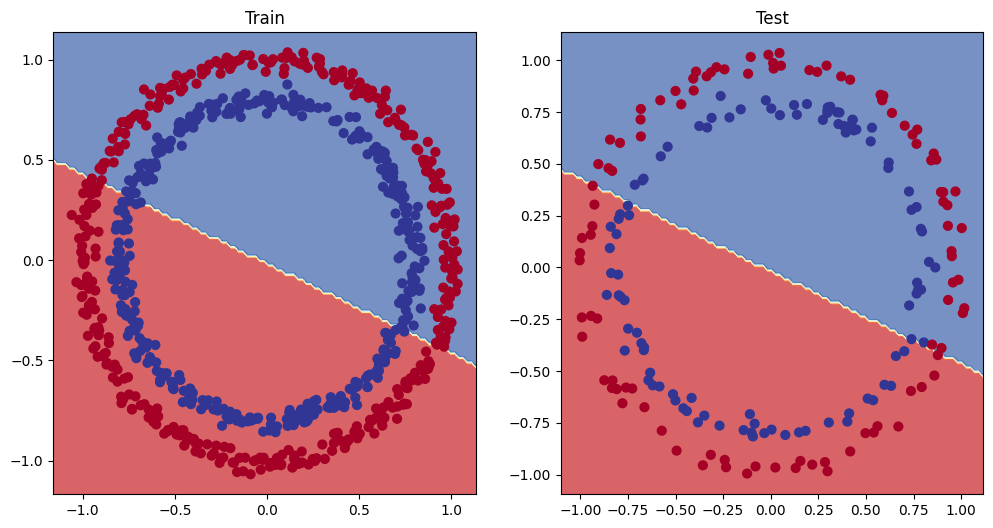

In [ ]:
# Plot decision boundary of the model
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.title("Train")
plot_decision_boundary(model_0, X_train, y_train)
plt.subplot(1, 2, 2)
plt.title("Test")
plot_decision_boundary(model_0, X_test, y_test)

## Improving a model (from a model's perspective)

* Add more layers - give the model more chances to learn about patterns in the data
* Add more hidden units - go from 16 to 24 hidden units
* Fit for longer
* Changing the activation functions
* Change the learning rate
* Change the loss function

These options are all from our model's perspective as they deal directly with the model rather than the data.

And because all these values(options) that engineers and scientists can change, they are referred to as **hyperparameters**.

When trying to improve your model, do not try and change all the hyperparameters in one go. By doing so, you will never know which tweak or change led to what effect/change.

In [ ]:
class CircleModelV2(nn.Module):
  def __init__(self):
    super().__init__()

    self.layer_1 = nn.Linear(in_features=2, out_features=16)
    self.layer_2 = nn.Linear(in_features=16, out_features=16)
    self.layer_3 = nn.Linear(in_features=16, out_features=1)

    self.linear_layers = nn.Sequential(
        nn.Linear(in_features=2, out_features=24),
        nn.Linear(in_features=24, out_features=24),
        nn.Linear(in_features=24, out_features=1)
    )

  def forward(self, x: torch.tensor) -> torch.tensor:
    # logits is represented by 'z'
    # z = self.layer_1(x)
    # z = self.layer_2(z)
    # z = self.layer_3(z)
    return self.layer_3(self.layer_2(self.layer_1(x)))

model_1 = CircleModelV2().to(device)
model_1

CircleModelV2(
  (layer_1): Linear(in_features=2, out_features=16, bias=True)
  (layer_2): Linear(in_features=16, out_features=16, bias=True)
  (layer_3): Linear(in_features=16, out_features=1, bias=True)
  (linear_layers): Sequential(
    (0): Linear(in_features=2, out_features=24, bias=True)
    (1): Linear(in_features=24, out_features=24, bias=True)
    (2): Linear(in_features=24, out_features=1, bias=True)
  )
)

In [ ]:
model_1.state_dict()

OrderedDict([('layer_1.weight',
              tensor([[ 0.0027,  0.1902],
                      [-0.5866,  0.3823],
                      [ 0.3042,  0.0054],
                      [ 0.5985,  0.6818],
                      [-0.4097,  0.4998],
                      [-0.5288, -0.2336],
                      [-0.3783, -0.5937],
                      [-0.4649, -0.4808],
                      [-0.2833, -0.4015],
                      [-0.5664,  0.6095],
                      [ 0.6010,  0.1325],
                      [-0.3689,  0.6710],
                      [ 0.2995, -0.2543],
                      [-0.2357, -0.4333],
                      [ 0.1204, -0.1524],
                      [ 0.6214,  0.5307]])),
             ('layer_1.bias',
              tensor([ 0.1275,  0.0325, -0.2212, -0.2845, -0.3732, -0.1206,  0.3295,  0.1850,
                       0.5006, -0.4245,  0.2615, -0.3418, -0.4962,  0.1310,  0.3233, -0.4821])),
             ('layer_2.weight',
              tensor([[ 0.0488, -0.1634,

In [ ]:
loss_fn = nn.BCEWithLogitsLoss()
optimizer = torch.optim.Adam(params=model_1.parameters(),
                             lr=0.1)

In [ ]:
torch.manual_seed(42)

epochs = 1000

X_train, y_train = X_train.to(device), y_train.to(device)
X_test, y_test = X_test.to(device), y_test.to(device)

for epoch in range(epochs):
  model_1.train()

  y_logits = model_1(X_train).squeeze()
  y_preds = torch.round(torch.sigmoid(y_logits))

  loss = loss_fn(y_logits,
                 y_train)
  acc = accuracy_fn(y_true=y_train,
                    y_pred=y_preds)

  optimizer.zero_grad()

  loss.backward()

  model_1.eval()
  with torch.inference_mode():
    test_logits = model_1(X_test).squeeze()
    test_pred_labels = torch.round(torch.sigmoid(test_logits))

    test_loss = loss_fn(test_logits,
                        y_test)
    test_accuracy = accuracy_fn(y_true=y_test,
                                y_pred=test_pred_labels)

  if epoch % 100 == 0:
    print(f"Epoch: {epoch} | Loss: {loss: .5f} | Accuracy: {acc: .2f}% | Test loss: {test_loss: .5f} | Test accuracy: {test_accuracy: .2f}%")

Epoch: 0 | Loss:  0.71175 | Accuracy:  51.75% | Test loss:  0.70243 | Test accuracy:  53.00%
Epoch: 100 | Loss:  0.71175 | Accuracy:  51.75% | Test loss:  0.70243 | Test accuracy:  53.00%
Epoch: 200 | Loss:  0.71175 | Accuracy:  51.75% | Test loss:  0.70243 | Test accuracy:  53.00%
Epoch: 300 | Loss:  0.71175 | Accuracy:  51.75% | Test loss:  0.70243 | Test accuracy:  53.00%
Epoch: 400 | Loss:  0.71175 | Accuracy:  51.75% | Test loss:  0.70243 | Test accuracy:  53.00%
Epoch: 500 | Loss:  0.71175 | Accuracy:  51.75% | Test loss:  0.70243 | Test accuracy:  53.00%
Epoch: 600 | Loss:  0.71175 | Accuracy:  51.75% | Test loss:  0.70243 | Test accuracy:  53.00%
Epoch: 700 | Loss:  0.71175 | Accuracy:  51.75% | Test loss:  0.70243 | Test accuracy:  53.00%
Epoch: 800 | Loss:  0.71175 | Accuracy:  51.75% | Test loss:  0.70243 | Test accuracy:  53.00%
Epoch: 900 | Loss:  0.71175 | Accuracy:  51.75% | Test loss:  0.70243 | Test accuracy:  53.00%


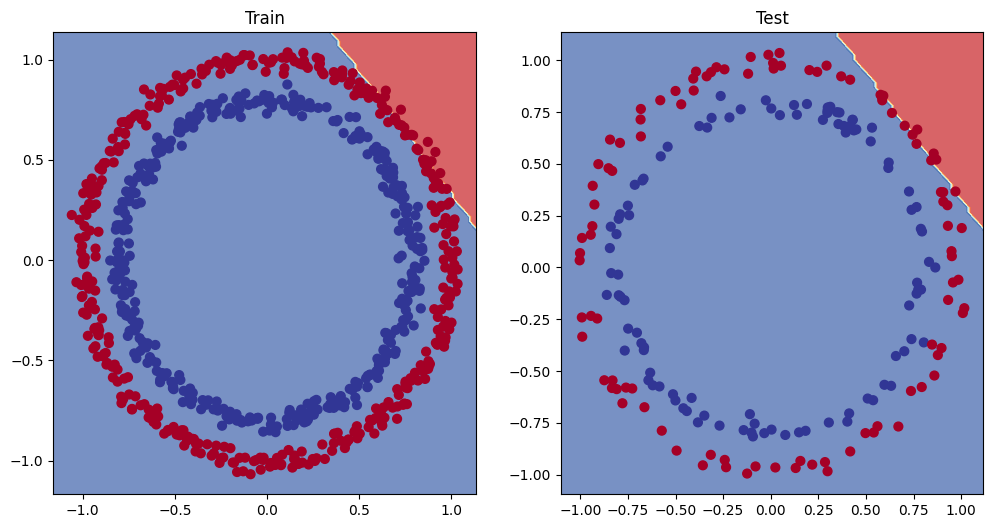

In [ ]:
# Plot decision boundary
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.title("Train")
plot_decision_boundary(model_1, X_train, y_train)
plt.subplot(1, 2, 2)
plt.title("Test")
plot_decision_boundary(model_1, X_test, y_test)

Our model still is just guessing. Let's try to build a straight line dataset and fit our model to learn and predict for that.

### Preparing model to see if our data can fit a straight line
One way to troubleshoot to a larger problem is to test out a smaller problem.

In [ ]:
weight = 0.7
bias = 0.3

start = 0
stop = 1
step = 0.01

X_regression = torch.arange(start, stop, step).unsqueeze(dim=1)
y_regression = weight * X_regression + bias

len(X_regression), len(y_regression), X_regression[:5], y_regression[:5]

(100,
 100,
 tensor([[0.0000],
         [0.0100],
         [0.0200],
         [0.0300],
         [0.0400]]),
 tensor([[0.3000],
         [0.3070],
         [0.3140],
         [0.3210],
         [0.3280]]))

In [ ]:
train_size = int(0.8 * len(X_regression))

X_regression_train, y_regression_train = X_regression[:train_size], y_regression[:train_size]
X_regression_test, y_regression_test = X_regression[train_size:], y_regression[train_size:]

len(X_regression_train), len(y_regression_test)

(80, 20)

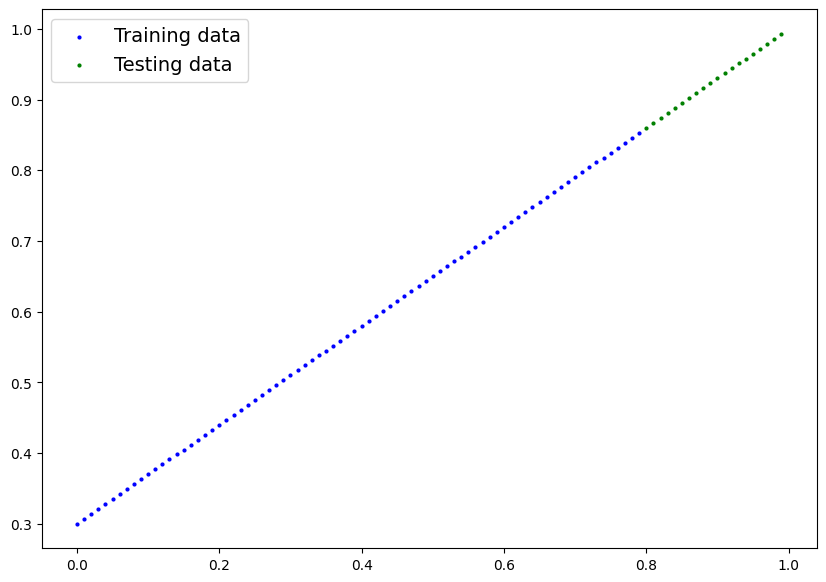

In [ ]:
plot_predictions(train_data=X_regression_train,
                 train_labels=y_regression_train,
                 test_data=X_regression_test,
                 test_labels=y_regression_test)

In [ ]:
model_1

CircleModelV2(
  (layer_1): Linear(in_features=2, out_features=16, bias=True)
  (layer_2): Linear(in_features=16, out_features=16, bias=True)
  (layer_3): Linear(in_features=16, out_features=1, bias=True)
  (linear_layers): Sequential(
    (0): Linear(in_features=2, out_features=24, bias=True)
    (1): Linear(in_features=24, out_features=24, bias=True)
    (2): Linear(in_features=24, out_features=1, bias=True)
  )
)

In [ ]:
### Adjusting model_1 to fit a straight line
model_2 = nn.Sequential(
    nn.Linear(in_features=1, out_features=16),
    nn.Linear(in_features=16, out_features=16),
    nn.Linear(in_features=16, out_features=1)
).to(device)

model_2

Sequential(
  (0): Linear(in_features=1, out_features=16, bias=True)
  (1): Linear(in_features=16, out_features=16, bias=True)
  (2): Linear(in_features=16, out_features=1, bias=True)
)

In [ ]:
loss_fn_rg = nn.L1Loss()

optimizer_for_lrg = torch.optim.Adam(params=model_2.parameters(),
                                     lr=0.0001)

In [ ]:
optimizer_for_lrg, loss_fn_rg

(Adam (
 Parameter Group 0
     amsgrad: False
     betas: (0.9, 0.999)
     capturable: False
     differentiable: False
     eps: 1e-08
     foreach: None
     fused: None
     lr: 0.0001
     maximize: False
     weight_decay: 0
 ),
 L1Loss())

In [ ]:
torch.manual_seed(42)

epochs = 1000

X_regression_train, y_regression_train = X_regression_train.to(device), y_regression_train.to(device)
X_regression_test, y_regression_test = X_regression_test.to(device), y_regression_test.to(device)

for epoch in range(epochs):
  model_2.train()

  y_rg_preds = model_2(X_regression_train)
  loss = loss_fn_rg(y_rg_preds, y_regression_train)
  optimizer_for_lrg.zero_grad()
  loss.backward()
  optimizer_for_lrg.step()

  model_2.eval()
  with torch.inference_mode():
    test_pred_lrg = model_2(X_regression_test)
    test_loss_lrg = loss_fn_rg(test_pred_lrg, y_regression_test)

  if epoch % 100 == 0:
    print(f"Epoch: {epoch} | Loss: {loss: .5f} | Test loss: {test_loss_lrg: .5f}")

Epoch: 0 | Loss:  0.44708 | Test loss:  0.80070
Epoch: 100 | Loss:  0.14124 | Test loss:  0.38595
Epoch: 200 | Loss:  0.07885 | Test loss:  0.18318
Epoch: 300 | Loss:  0.05796 | Test loss:  0.13247
Epoch: 400 | Loss:  0.03438 | Test loss:  0.07761
Epoch: 500 | Loss:  0.00741 | Test loss:  0.01603
Epoch: 600 | Loss:  0.00022 | Test loss:  0.00053
Epoch: 700 | Loss:  0.00085 | Test loss:  0.00104
Epoch: 800 | Loss:  0.00164 | Test loss:  0.00217
Epoch: 900 | Loss:  0.00085 | Test loss:  0.00054


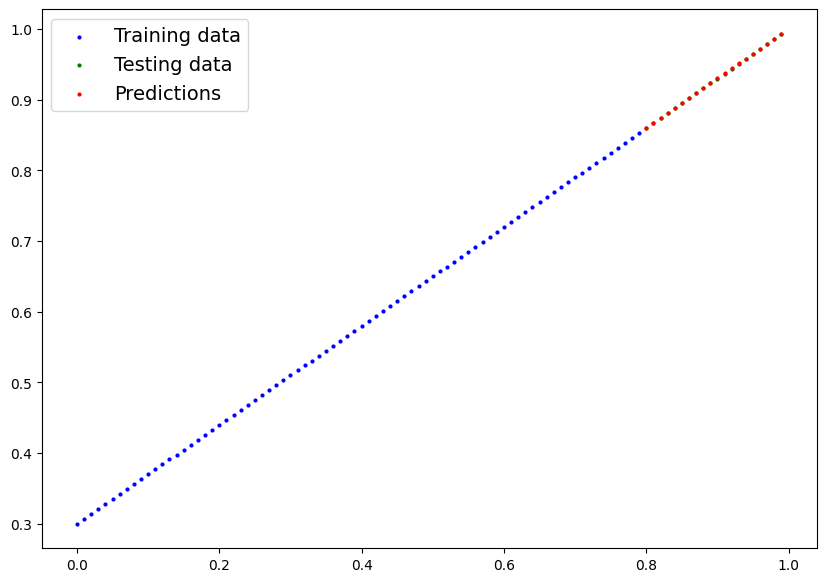

In [ ]:
model_2.eval()

with torch.inference_mode():
  y_preds_lgr = model_2(X_regression_test)

plot_predictions(train_data=X_regression_train.cpu(),
                 train_labels=y_regression_train.cpu(),
                 test_data=X_regression_test.cpu(),
                 test_labels=y_regression_test.cpu(),
                 predictions=y_preds_lgr.cpu())

## Non-Linearity

"What patterns could you draw if you were given an infinite amount of straight and non-straight lines?"

In machine learning terms, an infinite (but it really is finite) amount of linear and non-linear functions?

### Recreating non-linear data (red and blue circles)


In [ ]:
X_train[:5], y_train[:5]

(tensor([[ 0.6579, -0.4651],
         [ 0.6319, -0.7347],
         [-1.0086, -0.1240],
         [-0.9666, -0.2256],
         [-0.1666,  0.7994]]),
 tensor([1., 0., 0., 0., 1.]))

### Building a model with non-linearity

* Linear = straight lines
* Non-linear = non-straight lines

A nonlinear function is a mathematical function that **does not graph as a straight line** and **does not have a constant slope**

In [ ]:
class CircleModelv3(nn.Module):
  def __init__(self):
    super().__init__()
    self.layer_1 = nn.Linear(in_features=2, out_features=16)
    self.layer_2 = nn.Linear(in_features=16, out_features=16)
    self.layer_3 = nn.Linear(in_features=16, out_features=1)
    self.relu = nn.ReLU() # non-linear activation function

  def forward(self, x: torch.tensor) -> torch.tensor:
    return self.layer_3(self.relu(self.layer_2(self.relu(self.layer_1(x)))))

model_3 = CircleModelv3().to(device)
model_3

CircleModelv3(
  (layer_1): Linear(in_features=2, out_features=16, bias=True)
  (layer_2): Linear(in_features=16, out_features=16, bias=True)
  (layer_3): Linear(in_features=16, out_features=1, bias=True)
  (relu): ReLU()
)

In [ ]:
model_3.state_dict()

OrderedDict([('layer_1.weight',
              tensor([[ 0.5406,  0.5869],
                      [-0.1657,  0.6496],
                      [-0.1549,  0.1427],
                      [-0.3443,  0.4153],
                      [ 0.6233, -0.5188],
                      [ 0.6146,  0.1323],
                      [ 0.5224,  0.0958],
                      [ 0.3410, -0.0998],
                      [ 0.5451,  0.1045],
                      [-0.3301,  0.1802],
                      [-0.3258, -0.0829],
                      [-0.2872,  0.4691],
                      [-0.5582, -0.3260],
                      [-0.1997, -0.4252],
                      [ 0.0667, -0.6984],
                      [ 0.6386, -0.6007]])),
             ('layer_1.bias',
              tensor([ 0.5459,  0.1177, -0.2296,  0.4370,  0.1102,  0.5713,  0.0773, -0.2230,
                       0.1900, -0.1918,  0.2976,  0.6313,  0.4087, -0.3091,  0.4082,  0.1265])),
             ('layer_2.weight',
              tensor([[ 0.1270, -0.1524,

In [ ]:
loss_fn = nn.BCEWithLogitsLoss()
optimizer = torch.optim.Adam(params=model_3.parameters(),
                             lr=0.1)

In [ ]:
torch.manual_seed(42)

epochs = 1000

model_3.to(device)
X_train, y_train = X_train.to(device), y_train.to(device)
X_test, y_test = X_test.to(device), y_test.to(device)

for epoch in range(epochs):
  model_3.train()

  y_logits = model_3(X_train).squeeze()
  y_pred_labels = torch.round(torch.sigmoid(y_logits))

  loss = loss_fn(y_logits, y_train)
  accuracy = accuracy_fn(y_true=y_train,
                         y_pred=y_pred_labels)

  optimizer.zero_grad()
  loss.backward()
  optimizer.step()

  model_3.eval()
  with torch.inference_mode():
    test_logits = model_3(X_test).squeeze()
    test_pred_labels = torch.round(torch.sigmoid(test_logits))

    test_loss = loss_fn(test_logits, y_test)
    test_accuracy = accuracy_fn(test_pred_labels, y_test)

  if epoch % 100 == 0:
    print(f"Epoch: {epoch} | Loss: {loss: .5f} | Accuracy: {accuracy: .2f}% | Test loss: {test_loss: .5f} | Test accuracy: {test_accuracy: .2f}%")

Epoch: 0 | Loss:  0.69753 | Accuracy:  50.00% | Test loss:  0.69366 | Test accuracy:  50.00%
Epoch: 100 | Loss:  0.00033 | Accuracy:  100.00% | Test loss:  0.00362 | Test accuracy:  100.00%
Epoch: 200 | Loss:  0.00022 | Accuracy:  100.00% | Test loss:  0.00344 | Test accuracy:  100.00%
Epoch: 300 | Loss:  0.00015 | Accuracy:  100.00% | Test loss:  0.00315 | Test accuracy:  100.00%
Epoch: 400 | Loss:  0.00010 | Accuracy:  100.00% | Test loss:  0.00287 | Test accuracy:  100.00%
Epoch: 500 | Loss:  0.00006 | Accuracy:  100.00% | Test loss:  0.00284 | Test accuracy:  100.00%
Epoch: 600 | Loss:  0.00005 | Accuracy:  100.00% | Test loss:  0.00310 | Test accuracy:  100.00%
Epoch: 700 | Loss:  0.00004 | Accuracy:  100.00% | Test loss:  0.00332 | Test accuracy:  100.00%
Epoch: 800 | Loss:  0.00003 | Accuracy:  100.00% | Test loss:  0.00344 | Test accuracy:  100.00%
Epoch: 900 | Loss:  0.00003 | Accuracy:  100.00% | Test loss:  0.00354 | Test accuracy:  100.00%


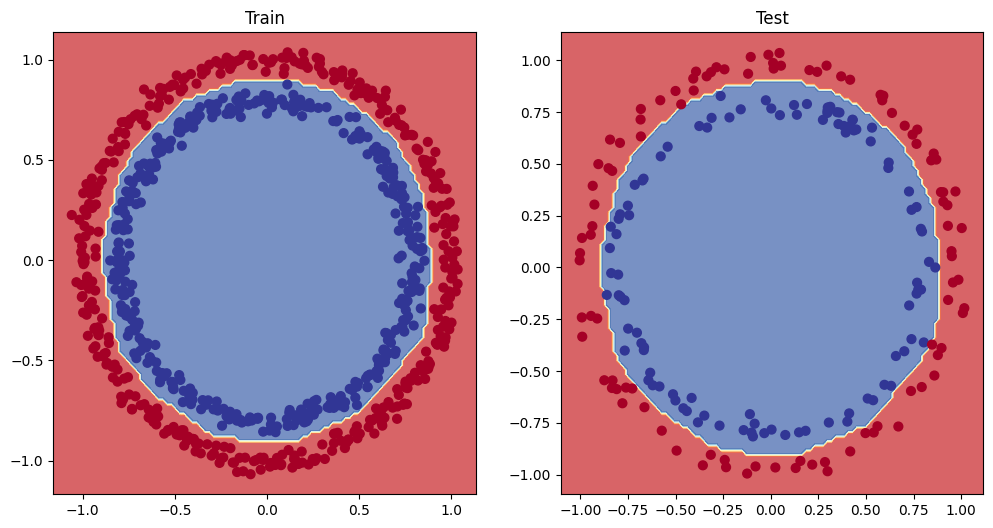

In [ ]:
# Plot decision boundary
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.title("Train")
plot_decision_boundary(model_3, X_train, y_train)
plt.subplot(1, 2, 2)
plt.title("Test")
plot_decision_boundary(model_3, X_test, y_test)

## Replicating non-linear activation functions

Neural networks, rather than us telling the model what to learn, we give it the tools to discover patterns in data and it tries to figure out the best patterns by itself. The tools are:
* Linear functions
* Non-linear functions

In [ ]:
# Create a tensor
a = torch.arange(-10, 10, 0.1, dtype=torch.float32)
a[:10], a.dtype

(tensor([-10.0000,  -9.9000,  -9.8000,  -9.7000,  -9.6000,  -9.5000,  -9.4000,
          -9.3000,  -9.2000,  -9.1000]),
 torch.float32)

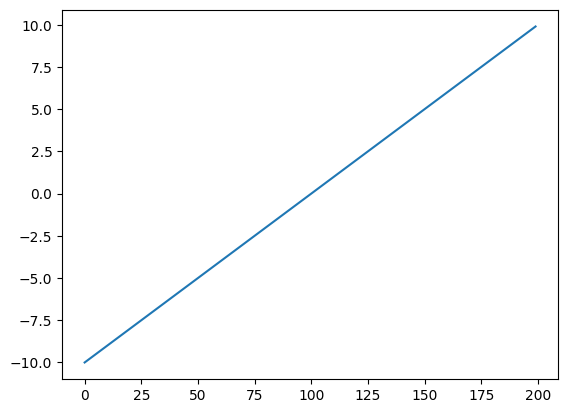

In [ ]:
# Visualize tensor
plt.plot(a)

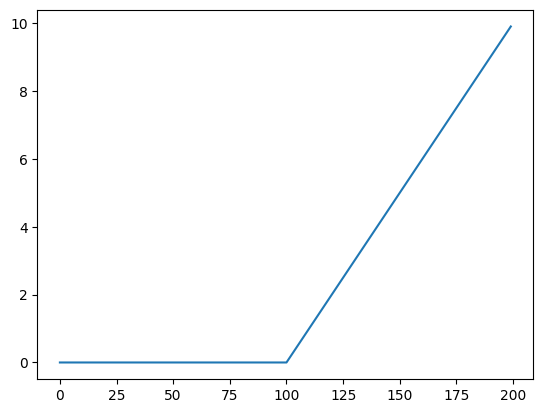

In [ ]:
plt.plot(torch.relu(a))

**ReLU(x) = (x)+ = max(0,x)**

The ReLU function turns all negative numbers into zero(0) because it takes the maximum b/w zero and the input x.





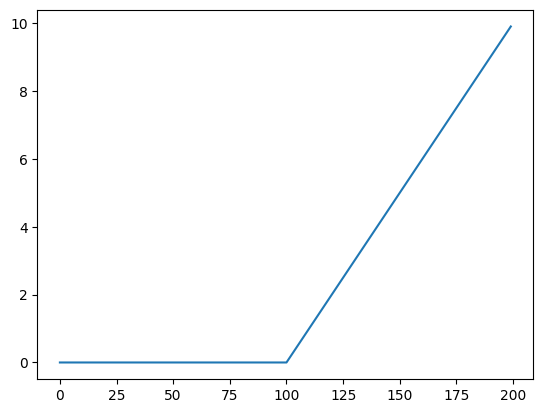

In [ ]:
def relu(x: torch.tensor) -> torch.tensor:
  return torch.max(torch.tensor(0), x)

plt.plot(relu(a))

In [ ]:
torch.relu(a) == relu(a)

tensor([True, True, True, True, True, True, True, True, True, True, True, True,
        True, True, True, True, True, True, True, True, True, True, True, True,
        True, True, True, True, True, True, True, True, True, True, True, True,
        True, True, True, True, True, True, True, True, True, True, True, True,
        True, True, True, True, True, True, True, True, True, True, True, True,
        True, True, True, True, True, True, True, True, True, True, True, True,
        True, True, True, True, True, True, True, True, True, True, True, True,
        True, True, True, True, True, True, True, True, True, True, True, True,
        True, True, True, True, True, True, True, True, True, True, True, True,
        True, True, True, True, True, True, True, True, True, True, True, True,
        True, True, True, True, True, True, True, True, True, True, True, True,
        True, True, True, True, True, True, True, True, True, True, True, True,
        True, True, True, True, True, Tr

In [ ]:
def sigmoid(x: torch.tensor) -> torch.tensor:
  return 1 / (1 + torch.exp(-x))

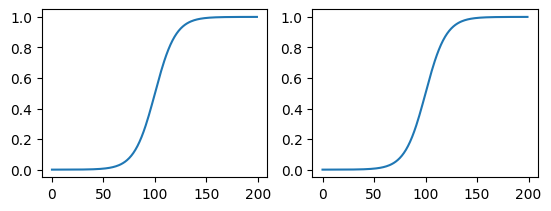

In [ ]:
plt.subplot(2,2,1)
plt.plot(torch.sigmoid(a))
plt.subplot(2,2,2)
plt.plot(sigmoid(a))

## Putting it all together with a multi-class classification problem

* Binary classification - one thing or another
* Multi-class classification - more than one thing or another

### Create a toy multi-class dataset

In [ ]:
import torch
import torch.nn as nn
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from sklearn.model_selection import train_test_split

# set the hyperparameters for data creation
NUM_CLASSES = 4
NUM_FEATURES = 2
RANDOM_SEED = 42

# create multi-class data
X_blob, y_blob = make_blobs(n_samples=1000,
                            n_features=NUM_FEATURES,
                            centers=NUM_CLASSES,
                            cluster_std=1.5, # standard deviation, give the clusters a little shake up
                            random_state=RANDOM_SEED)

# turn data into tensors
X_blob = torch.from_numpy(X_blob).type(torch.float32)
y_blob = torch.from_numpy(y_blob).type(torch.LongTensor)
print(X_blob[:5], y_blob[:5])

# split into train and test sets
X_blob_train, X_blob_test, y_blob_train, y_blob_test = train_test_split(X_blob,
                                                                        y_blob,
                                                                        test_size=0.2,
                                                                        random_state=RANDOM_SEED)

tensor([[-8.4134,  6.9352],
        [-5.7665, -6.4312],
        [-6.0421, -6.7661],
        [ 3.9508,  0.6984],
        [ 4.2505, -0.2815]]) tensor([3, 2, 2, 1, 1])


In [ ]:
X_blob[:5], y_blob[:5]

(tensor([[-8.4134,  6.9352],
         [-5.7665, -6.4312],
         [-6.0421, -6.7661],
         [ 3.9508,  0.6984],
         [ 4.2505, -0.2815]]),
 tensor([3, 2, 2, 1, 1]))

In [ ]:
X_blob[0], y_blob[0]

(tensor([-8.4134,  6.9352]), tensor(3))

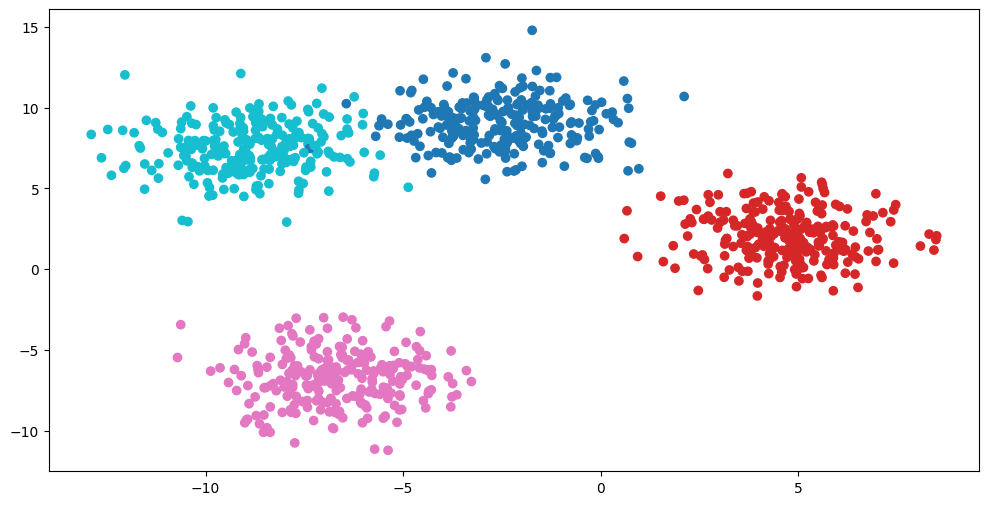

In [ ]:
plt.figure(figsize=(12, 6))
plt.scatter(X_blob[:, 0], X_blob[:, 1], c=y_blob, cmap=plt.cm.tab10)

### Building a multi-class classification model



In [ ]:
device = "cuda" if torch.cuda.is_available() else "cpu"
device

'cpu'

In [ ]:
class BlobModelv1(nn.Module):
  def __init__(self, input_features, output_features, hidden_units=8):
    """
    Initializes multi-class classification model:

    Args:
      input_features: int - number of input features to the model
      output_features: int - number of output features (number of output classes)
      hidden_units: int - number of hidden units between layers (default 16)

    Returns:

    Example:

    """
    super().__init__()
    self.linear_layer_stack = nn.Sequential(
        nn.Linear(in_features=input_features, out_features=hidden_units),
        nn.ReLU(),
        nn.Linear(in_features=hidden_units, out_features=16),
        nn.ReLU(),
        nn.Linear(in_features=16, out_features=hidden_units),
        nn.ReLU(),
        nn.Linear(in_features=hidden_units, out_features=output_features)
    )

  def forward(self, x):
    return self.linear_layer_stack(x)

model_4 = BlobModelv1(input_features=NUM_FEATURES,
                      output_features=NUM_CLASSES,
                      hidden_units=8).to(device)


model_4

BlobModelv1(
  (linear_layer_stack): Sequential(
    (0): Linear(in_features=2, out_features=8, bias=True)
    (1): ReLU()
    (2): Linear(in_features=8, out_features=16, bias=True)
    (3): ReLU()
    (4): Linear(in_features=16, out_features=8, bias=True)
    (5): ReLU()
    (6): Linear(in_features=8, out_features=4, bias=True)
  )
)

In [ ]:
X_blob_train.shape, y_blob_train.shape

(torch.Size([800, 2]), torch.Size([800]))

In [ ]:
torch.unique(y_blob_train)

tensor([0, 1, 2, 3])

In [ ]:
next(model_4.parameters()).device

device(type='cpu')

In [ ]:
loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(params=model_4.parameters(),
                             lr=0.1)

loss_fn, optimizer

(CrossEntropyLoss(),
 SGD (
 Parameter Group 0
     dampening: 0
     differentiable: False
     foreach: None
     fused: None
     lr: 0.1
     maximize: False
     momentum: 0
     nesterov: False
     weight_decay: 0
 ))

### Getting prediction probabilities for a multi-class model

In order to evaluate, train and test our model, we need to convert our model's outputs (logits) to prediction probabilities and then to prediction labels.

**Logits** (raw outputs of the model) **->** **Prediction Probabilities**(use torch.softmax) **-> Prediction Labels** (take the torch.argmax() of the prediction probabilities)

In [ ]:
next(model_4.parameters()).device

device(type='cpu')

In [ ]:
X_blob_train, X_blob_test, y_blob_train, y_blob_test = X_blob_train.to(device), X_blob_test.to(device), y_blob_train.to(device), y_blob_test.to(device)

# getting some raw outputs from the model (logits)
y_logits = model_4(X_blob_test)

y_logits[:5] # contains 4 values per output because we set our model to have 4 out_features (the number of output classes)

tensor([[ 0.3967,  0.1840, -0.4201,  0.0837],
        [-0.0298,  0.6560, -0.1298, -0.0839],
        [-0.0233,  0.1913, -0.1790, -0.0570],
        [ 0.1697,  0.1775, -0.2871,  0.0194],
        [ 0.1685,  0.3941, -0.4098, -0.1914]], grad_fn=<SliceBackward0>)

In [ ]:
torch.argmax(y_logits)

tensor(541)

In [ ]:
y_blob_test[:5]

tensor([1, 3, 2, 1, 0])

In [ ]:
# Convert our model's logit outputs to prediction probabilities
y_pred_probs = torch.softmax(y_logits, dim=1) # we want it across the first dimension
y_logits[:5], y_pred_probs[:5]

(tensor([[ 0.3967,  0.1840, -0.4201,  0.0837],
         [-0.0298,  0.6560, -0.1298, -0.0839],
         [-0.0233,  0.1913, -0.1790, -0.0570],
         [ 0.1697,  0.1775, -0.2871,  0.0194],
         [ 0.1685,  0.3941, -0.4098, -0.1914]], grad_fn=<SliceBackward0>),
 tensor([[0.3354, 0.2711, 0.1482, 0.2453],
         [0.2067, 0.4104, 0.1870, 0.1958],
         [0.2462, 0.3051, 0.2107, 0.2380],
         [0.2856, 0.2878, 0.1809, 0.2457],
         [0.2848, 0.3568, 0.1597, 0.1987]], grad_fn=<SliceBackward0>))

These are the prediction probabilities for each class. These are the range of probabilities as to how much our model thinks that a single value is a particular class.

In [ ]:
y_pred_probs[2]

tensor([0.2462, 0.3051, 0.2107, 0.2380], grad_fn=<SelectBackward0>)

In [ ]:
for i in range(len(y_pred_probs[2])):
  print(f"{y_pred_probs[2][i]: .4f} how much it thinks this is class {i}")

 0.2462 how much it thinks this is class 0
 0.3051 how much it thinks this is class 1
 0.2107 how much it thinks this is class 2
 0.2380 how much it thinks this is class 3


In [ ]:
torch.sum(y_pred_probs[2]) # they all sum up to 1

tensor(1., grad_fn=<SumBackward0>)

In [ ]:
torch.max(y_pred_probs[2])

tensor(0.3051, grad_fn=<MaxBackward1>)

In [ ]:
torch.argmax(y_pred_probs[2]) # gives the particular index value of the largest value across the values

tensor(1)

The model thinks that index 2 (or otherwise, class number 2) is the right class for that particular sample (sample `y_pred_probs[2]`)

In [ ]:
len(y_pred_probs)

200

In [ ]:
# Convert our model's prediction probabilites to prediction labels
y_preds = torch.argmax(y_pred_probs, dim=1) # along the first dimension
y_preds

tensor([0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1,
        1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1,
        0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1,
        1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1,
        0, 1, 1, 1, 1, 0, 1, 0])

In [ ]:
y_blob_test

tensor([1, 3, 2, 1, 0, 3, 2, 0, 2, 0, 0, 1, 0, 0, 0, 3, 3, 2, 3, 3, 3, 0, 1, 2,
        2, 2, 3, 0, 1, 0, 3, 1, 1, 3, 1, 2, 1, 3, 0, 2, 0, 3, 3, 2, 0, 3, 1, 1,
        0, 3, 1, 0, 1, 1, 3, 2, 1, 1, 3, 2, 2, 0, 3, 2, 2, 0, 0, 3, 3, 0, 0, 3,
        3, 3, 2, 3, 3, 3, 3, 1, 0, 2, 3, 2, 3, 3, 2, 3, 3, 2, 3, 3, 1, 3, 3, 3,
        1, 0, 3, 2, 0, 0, 3, 0, 2, 3, 1, 0, 3, 2, 1, 1, 0, 2, 2, 3, 0, 0, 1, 2,
        2, 3, 0, 1, 2, 0, 0, 0, 2, 3, 1, 2, 3, 2, 0, 3, 0, 0, 1, 1, 1, 0, 2, 2,
        2, 2, 0, 3, 3, 2, 2, 1, 3, 2, 0, 0, 3, 3, 2, 1, 2, 0, 3, 2, 0, 3, 2, 0,
        2, 2, 2, 0, 3, 1, 1, 1, 1, 1, 3, 1, 0, 2, 2, 1, 2, 2, 0, 1, 2, 2, 0, 0,
        1, 3, 2, 0, 3, 1, 2, 1])

### Create a training loop and testing loop for a multi-class model

Scroll up to the place where we create our training and testing sets. There, we have set the dtype to `torch.float32` or `torch.float`

A note on the CrossEntropyLoss on the in the Pytorch documentation states as follows:
> The performance of this criterion is generally better when `target contains class indices`, as this allows for optimized computation. Consider providing target as class probabilities only when a single class label per minibatch item is too restrictive.

It would be better if our indices were ints rather than floats




In [ ]:
y_blob_train.dtype, y_logits.dtype

(torch.int64, torch.float32)

In [ ]:
X_blob_train.shape, y_blob_train.shape, X_blob_test.shape, y_blob_test.shape

(torch.Size([800, 2]),
 torch.Size([800]),
 torch.Size([200, 2]),
 torch.Size([200]))

In [ ]:
torch.manual_seed(42)

epochs = 100

for epoch in range(epochs):
  model_4.train()

  y_logits = model_4(X_blob_train)
  y_pred = torch.softmax(y_logits, dim=1).argmax(dim=1)

  loss = loss_fn(y_logits, y_blob_train)
  accuracy = accuracy_fn(y_true=y_blob_train,
                         y_pred=y_pred)

  optimizer.zero_grad()
  loss.backward()
  optimizer.step()

  model_4.eval()
  with torch.inference_mode():
    test_logits = model_4(X_blob_test)
    test_preds = torch.softmax(test_logits, dim=1).argmax(dim=1)

    # print(test_logits.shape, y_blob_test.shape)
    test_loss = loss_fn(test_logits, y_blob_test)
    test_accuracy = accuracy_fn(y_true=y_blob_test,
                                y_pred=test_preds)

  if epoch % 10 == 0:
    print(f"Epoch: {epoch} | Loss: {loss: .4f}, Acc: {accuracy: .2f}% | Test loss: {test_loss: .4f}, Test acc: {test_accuracy: .2f}%")

Epoch: 0 | Loss:  1.4727, Acc:  5.75% | Test loss:  1.4398, Test acc:  4.50%
Epoch: 10 | Loss:  1.2570, Acc:  27.38% | Test loss:  1.2570, Test acc:  26.00%
Epoch: 20 | Loss:  1.0906, Acc:  38.62% | Test loss:  1.0702, Test acc:  41.00%
Epoch: 30 | Loss:  0.8685, Acc:  68.25% | Test loss:  0.8188, Test acc:  67.50%
Epoch: 40 | Loss:  0.6722, Acc:  92.75% | Test loss:  0.6173, Test acc:  93.00%
Epoch: 50 | Loss:  0.5062, Acc:  95.75% | Test loss:  0.4529, Test acc:  97.50%
Epoch: 60 | Loss:  0.2746, Acc:  98.75% | Test loss:  0.2414, Test acc:  99.50%
Epoch: 70 | Loss:  0.1324, Acc:  99.25% | Test loss:  0.1154, Test acc:  99.50%
Epoch: 80 | Loss:  0.0788, Acc:  99.25% | Test loss:  0.0658, Test acc:  99.50%
Epoch: 90 | Loss:  0.0568, Acc:  99.12% | Test loss:  0.0453, Test acc:  99.50%


## Making and evaluating predictions with a multi-class model

In [ ]:
model_4.eval()

with torch.inference_mode():
  y_logits = model_4(X_blob_test)

y_logits[:5]

tensor([[  2.2399,   7.0250,  -5.4235,  -0.7437],
        [  1.9448,  -0.7123,   1.4993,   7.7868],
        [ -3.5432,  -0.5525,   6.0828,   2.4729],
        [  0.2224,   4.0904,  -1.9784,  -0.9744],
        [ 10.4482,   5.4596, -13.0072,   3.1496]])

In [ ]:
y_pred_probs = torch.softmax(y_logits, dim=1)
y_preds = torch.argmax(y_pred_probs, dim=1)
y_preds[:5]

tensor([1, 3, 2, 1, 0])

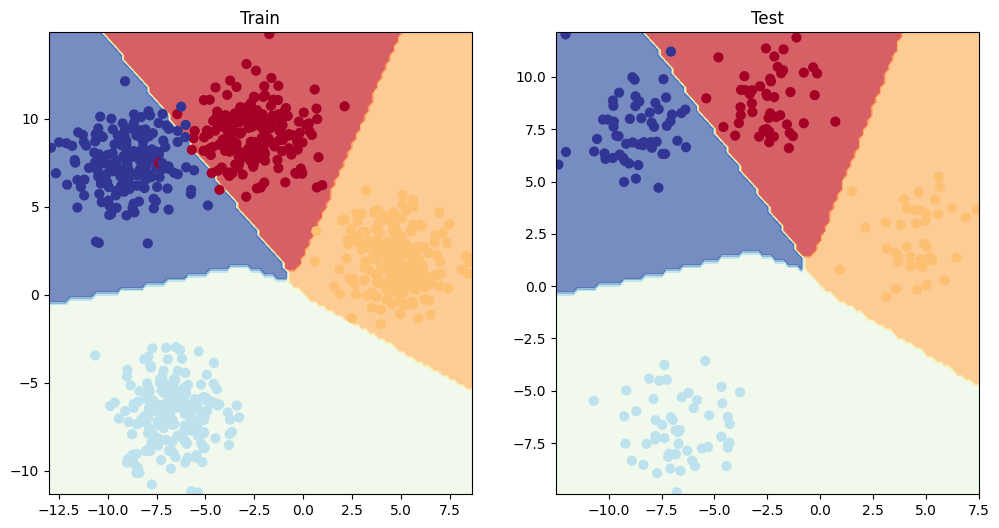

In [ ]:
plt.figure(figsize=(12, 6))
plt.subplot(1,2,1)
plt.title("Train")
plot_decision_boundary(model_4, X_blob_train, y_blob_train)
plt.subplot(1,2,2)
plt.title("Test")
plot_decision_boundary(model_4, X_blob_test, y_blob_test)

>***model_4 does not seem to be working for some reason. Therefore, I am creating a new model and creating a training and testing loop for that.***





In [ ]:
model_5 = nn.Sequential(
    nn.Linear(in_features=2, out_features=8),
    nn.ReLU(),
    nn.Linear(in_features=8, out_features=16),
    nn.ReLU(),
    nn.Linear(in_features=16, out_features=8),
    nn.ReLU(),
    nn.Linear(in_features=8, out_features=4)
)

model_5

Sequential(
  (0): Linear(in_features=2, out_features=8, bias=True)
  (1): ReLU()
  (2): Linear(in_features=8, out_features=16, bias=True)
  (3): ReLU()
  (4): Linear(in_features=16, out_features=8, bias=True)
  (5): ReLU()
  (6): Linear(in_features=8, out_features=4, bias=True)
)

In [ ]:
next(model_5.parameters()).device

device(type='cpu')

In [ ]:
loss_fm5 = nn.CrossEntropyLoss()
optimizer_fm5 = torch.optim.Adam(params=model_5.parameters(),
                                 lr=0.1)

loss_fm5, optimizer_fm5

(CrossEntropyLoss(),
 Adam (
 Parameter Group 0
     amsgrad: False
     betas: (0.9, 0.999)
     capturable: False
     differentiable: False
     eps: 1e-08
     foreach: None
     fused: None
     lr: 0.1
     maximize: False
     weight_decay: 0
 ))

The below code is more robust and complete. It moves all the data to the device explicitly. Focus on **completeness!!!**

In [ ]:
next(model_5.parameters()).device
model_5.to(device)
next(model_5.parameters()).device

device(type='cpu')

In [ ]:
# Fit the model
torch.manual_seed(42)

# Set number of epochs
epochs = 100

# Put data to target device
X_blob_train, y_blob_train = X_blob_train.to(device), y_blob_train.to(device)
X_blob_test, y_blob_test = X_blob_test.to(device), y_blob_test.to(device)

for epoch in range(epochs):
    ### Training
    model_5.train()

    # 1. Forward pass
    y_logits = model_5(X_blob_train) # model outputs raw logits
    y_pred = torch.softmax(y_logits, dim=1).argmax(dim=1) # go from logits -> prediction probabilities -> prediction labels
    # print(y_logits)
    # 2. Calculate loss and accuracy
    loss = loss_fm5(y_logits, y_blob_train)
    acc = accuracy_fn(y_true=y_blob_train,
                      y_pred=y_pred)

    # 3. Optimizer zero grad
    optimizer_fm5.zero_grad()

    # 4. Loss backwards
    loss.backward()

    # 5. Optimizer step
    optimizer_fm5.step()

    ### Testing
    model_5.eval()
    with torch.inference_mode():
      # 1. Forward pass
      test_logits = model_5(X_blob_test)
      test_pred = torch.softmax(test_logits, dim=1).argmax(dim=1)
      # 2. Calculate test loss and accuracy
      test_loss = loss_fm5(test_logits, y_blob_test)
      test_acc = accuracy_fn(y_true=y_blob_test,
                             y_pred=test_pred)

    # Print out what's happening
    if epoch % 10 == 0:
        print(f"Epoch: {epoch} | Loss: {loss:.5f}, Acc: {acc:.2f}% | Test Loss: {test_loss:.5f}, Test Acc: {test_acc:.2f}%")

Epoch: 0 | Loss: 1.47269, Acc: 5.75% | Test Loss: 1.34602, Test Acc: 24.50%
Epoch: 10 | Loss: 0.29414, Acc: 97.25% | Test Loss: 0.25205, Test Acc: 99.00%
Epoch: 20 | Loss: 0.07871, Acc: 99.25% | Test Loss: 0.05174, Test Acc: 100.00%
Epoch: 30 | Loss: 0.03875, Acc: 99.12% | Test Loss: 0.02444, Test Acc: 99.50%
Epoch: 40 | Loss: 0.02814, Acc: 99.38% | Test Loss: 0.01402, Test Acc: 100.00%
Epoch: 50 | Loss: 0.02246, Acc: 99.50% | Test Loss: 0.01394, Test Acc: 100.00%
Epoch: 60 | Loss: 0.01997, Acc: 99.38% | Test Loss: 0.00858, Test Acc: 100.00%
Epoch: 70 | Loss: 0.01890, Acc: 99.38% | Test Loss: 0.00740, Test Acc: 100.00%
Epoch: 80 | Loss: 0.01849, Acc: 99.50% | Test Loss: 0.00830, Test Acc: 100.00%
Epoch: 90 | Loss: 0.01877, Acc: 99.62% | Test Loss: 0.00780, Test Acc: 100.00%


In [ ]:
model_5.eval()

with torch.inference_mode():
  y_logits = model_5(X_test)

y_pred_probs = torch.softmax(y_logits, dim=1)
y_preds = torch.argmax(y_pred_probs, dim=1)
y_preds[:5]

tensor([0, 1, 0, 0, 1])

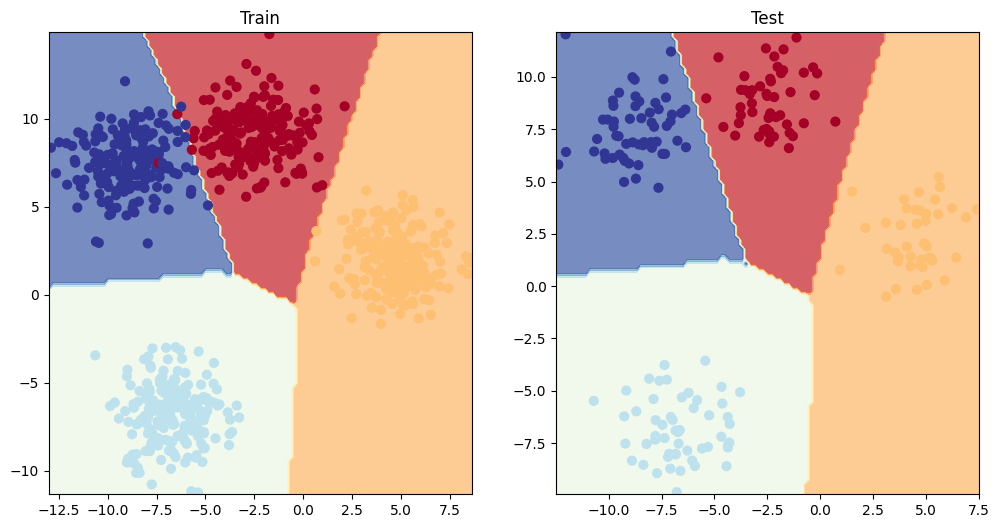

In [ ]:
plt.figure(figsize=(12, 6))
plt.subplot(1,2,1)
plt.title("Train")
plot_decision_boundary(model_5, X_blob_train, y_blob_train)
plt.subplot(1,2,2)
plt.title("Test")
plot_decision_boundary(model_5, X_blob_test, y_blob_test)

Creating a new model to make sure that I'm not wrong anywhere again

In [ ]:
# comment out ReLU and check if the problem really requires non-linear layers
model_6 = nn.Sequential(
    nn.Linear(in_features=2, out_features=8),
    # nn.ReLU(),
    nn.Linear(in_features=8, out_features=16),
    # nn.ReLU(),
    nn.Linear(in_features=16, out_features=8),
    # nn.ReLU(),
    nn.Linear(in_features=8, out_features=4)
)

loss_fm6 = nn.CrossEntropyLoss()
optimizer_fm6 = torch.optim.Adam(params=model_6.parameters(),
                                 lr=0.1)

In [ ]:
model_6.to(device)

Sequential(
  (0): Linear(in_features=2, out_features=8, bias=True)
  (1): Linear(in_features=8, out_features=16, bias=True)
  (2): Linear(in_features=16, out_features=8, bias=True)
  (3): Linear(in_features=8, out_features=4, bias=True)
)

In [ ]:
torch.manual_seed(42)

epochs = 100

X_blob_train, y_blob_train = X_blob_train.to(device), y_blob_train.to(device)
X_blob_test, y_blob_test = X_blob_test.to(device), y_blob_test.to(device)

for epoch in range(epochs):
  model_6.train()

  y_logits = model_6(X_blob_train)
  y_preds = torch.softmax(y_logits, dim=1).argmax(dim=1)

  loss = loss_fm6(y_logits, y_blob_train)
  accuracy = accuracy_fn(y_true=y_blob_train,
                         y_pred=y_preds)

  optimizer_fm6.zero_grad()
  loss.backward()
  optimizer_fm6.step()

  model_6.eval()
  with torch.inference_mode():
    test_logits = model_6(X_blob_test)
    test_pred = torch.softmax(test_logits, dim=1).argmax(dim=1)

    test_loss = loss_fm6(test_logits, y_blob_test)
    test_acc = accuracy_fn(y_true=y_blob_test,
                           y_pred=test_pred)

  if epoch % 10 == 0:
    print(f"Epoch: {epoch} | Loss: {loss: .4f}, Acc: {accuracy: .2f}% | Test loss: {test_loss: .4f}, Test_acc: {test_acc: .2f}%")

Epoch: 0 | Loss:  2.0609, Acc:  0.00% | Test loss:  1.3002, Test_acc:  68.50%
Epoch: 10 | Loss:  0.0339, Acc:  98.75% | Test loss:  0.0436, Test_acc:  98.50%
Epoch: 20 | Loss:  0.0441, Acc:  98.88% | Test loss:  0.0445, Test_acc:  99.00%
Epoch: 30 | Loss:  0.0287, Acc:  99.25% | Test loss:  0.0044, Test_acc:  100.00%
Epoch: 40 | Loss:  0.0217, Acc:  99.50% | Test loss:  0.0115, Test_acc:  99.50%
Epoch: 50 | Loss:  0.0189, Acc:  99.50% | Test loss:  0.0061, Test_acc:  100.00%
Epoch: 60 | Loss:  0.0181, Acc:  99.50% | Test loss:  0.0058, Test_acc:  100.00%
Epoch: 70 | Loss:  0.0172, Acc:  99.38% | Test loss:  0.0054, Test_acc:  100.00%
Epoch: 80 | Loss:  0.0172, Acc:  99.50% | Test loss:  0.0044, Test_acc:  100.00%
Epoch: 90 | Loss:  0.0170, Acc:  99.38% | Test loss:  0.0040, Test_acc:  100.00%


In [ ]:
model_6.eval()

with torch.inference_mode():
  y_logits = model_6(X_blob_test)

y_pred_probs = torch.softmax(y_logits, dim=1)
y_preds = torch.argmax(y_pred_probs, dim=1)

y_preds[:5]

tensor([1, 3, 2, 1, 0])

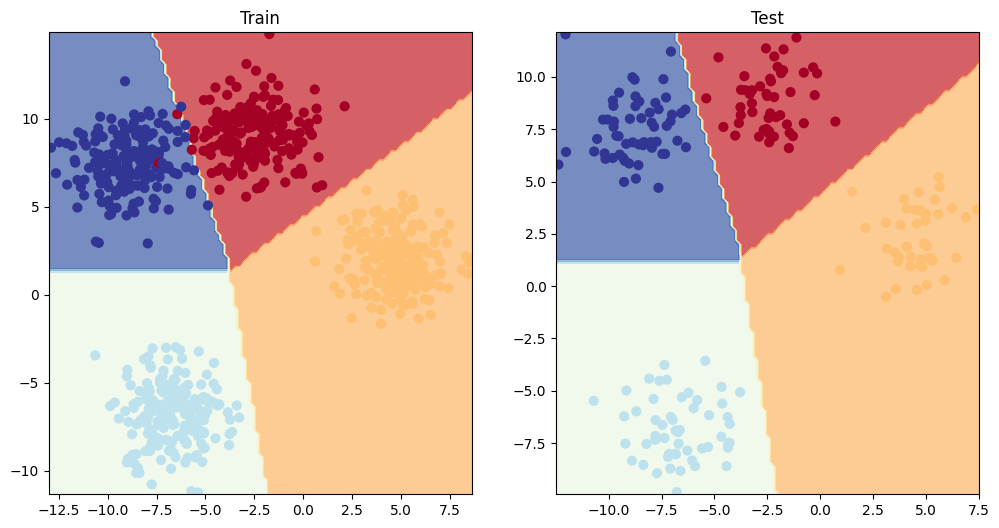

In [ ]:
plt.figure(figsize=(12, 6))
plt.subplot(1,2,1)
plt.title("Train")
plot_decision_boundary(model_6, X_blob_train, y_blob_train)
plt.subplot(1,2,2)
plt.title("Test")
plot_decision_boundary(model_6, X_blob_test, y_blob_test)

When **not** using non-linear layers, the lines are certainly a lot straighter than compared to when using non-linear layers.

This is because our data is linear-ly seperable

**model_5** and **model_6** are working but model_4 is not for some reason

## A few more classification metrics (to evaluate our classification model)

* Accuracy (`good to use when you have balanced classes`) - out of `n` samples, how many does our model get right
* Precision
* Recall
* F1-score
* Confusion matrix
* Classification report

In [ ]:
!pip install torchmetrics

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 891.4/891.4 kB 43.0 MB/s eta 0:00:00


In [ ]:
y_preds.device, y_blob_test.device

(device(type='cpu'), device(type='cpu'))

In [ ]:
import torchmetrics
from torchmetrics.classification import MulticlassAccuracy

accuracy_metric = MulticlassAccuracy(num_classes=4)
accuracy_metric(y_preds.cpu(), y_blob_test.cpu())

tensor(1.)

In [ ]:
from torchmetrics import Accuracy

accuracy = Accuracy(task="multiclass", num_classes=4).to(device)
accuracy(y_preds, y_blob_test)

tensor(1.)

## Practising binary classification

Dataset: https://scikit-learn.org/0.16/modules/generated/sklearn.datasets.make_moons.html

In [ ]:
from sklearn.datasets import make_moons

n_samples = 1000

X, y = make_moons(n_samples=n_samples,
                  shuffle=False,
                  noise=0.2,
                  random_state=42)

len(X), len(y), X.shape, y.shape

(1000, 1000, (1000, 2), (1000,))

In [ ]:
X[:5], y[:5]

(array([[ 1.09934283, -0.02765286],
        [ 1.12951789,  0.31090171],
        [ 0.95309005, -0.03423617],
        [ 1.3156642 ,  0.17237315],
        [ 0.90578805,  0.13369245]]),
 array([0, 0, 0, 0, 0]))

In [ ]:
for i in range(0, 10):
  print(f"{X[i]} - {y[i]}")

[ 1.09934283 -0.02765286] - 0
[1.12951789 0.31090171] - 0
[ 0.95309005 -0.03423617] - 0
[1.3156642  0.17237315] - 0
[0.90578805 0.13369245] - 0
[ 0.90682104 -0.06167226] - 0
[ 1.04767908 -0.34489037] - 0
[ 0.65404549 -0.06840133] - 0
[0.79616567 0.11319439] - 0
[ 0.81679032 -0.22582906] - 0


In [ ]:
import pandas as pd

moons = pd.DataFrame({"X1": X[:, 0],
                      "X2": X[:, 1],
                      "labels": y,
                      })

moons.head(10)

,X1,X2,labels
0,1.099343,-0.027653,0
1,1.129518,0.310902,0
2,0.953090,-0.034236,0
3,1.315664,0.172373,0
4,0.905788,0.133692,0
5,0.906821,-0.061672,0
6,1.047679,-0.344890,0
7,0.654045,-0.068401,0
8,0.796166,0.113194,0
9,0.816790,-0.225829,0


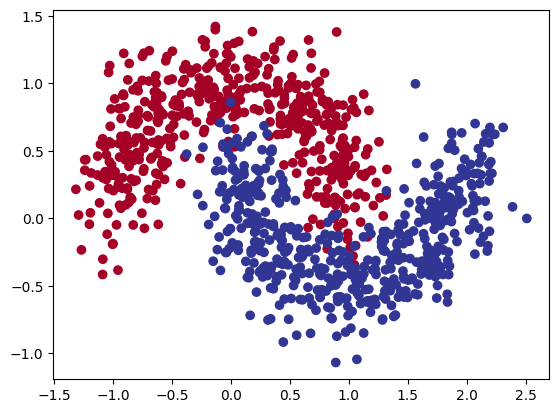

In [ ]:
import matplotlib.pyplot as plt

plt.scatter(x=X[:, 0],
            y=X[:, 1],
            c=y,
            cmap=plt.cm.RdYlBu)

In [ ]:
X = torch.from_numpy(X).type(torch.float32)
y = torch.from_numpy(y).type(torch.float32)

X.dtype, y.dtype

(torch.float32, torch.float32)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                    test_size=0.2,
                                                    random_state=42)

len(X_train), len(y_train), len(X_test), len(y_test)

(800, 800, 200, 200)

In [ ]:
import torch.nn as nn

class MoonClassificationV1(nn.Module):
  def __init__(self):
    super().__init__()

    self.linear_layers = nn.Sequential(
        nn.Linear(in_features=2, out_features=8),
        nn.ReLU(),
        nn.Linear(in_features=8, out_features=16),
        nn.ReLU(),
        nn.Linear(in_features=16, out_features=64),
        nn.ReLU(),
        nn.Linear(in_features=64, out_features=16),
        nn.ReLU(),
        nn.Linear(in_features=16, out_features=8),
        nn.ReLU(),
        nn.Linear(in_features=8, out_features=1)
    )

  def forward(self, x: torch.tensor) -> torch.tensor:
    return self.linear_layers(x)

model_7 = MoonClassificationV1()

model_7

MoonClassificationV1(
  (linear_layers): Sequential(
    (0): Linear(in_features=2, out_features=8, bias=True)
    (1): ReLU()
    (2): Linear(in_features=8, out_features=16, bias=True)
    (3): ReLU()
    (4): Linear(in_features=16, out_features=64, bias=True)
    (5): ReLU()
    (6): Linear(in_features=64, out_features=16, bias=True)
    (7): ReLU()
    (8): Linear(in_features=16, out_features=8, bias=True)
    (9): ReLU()
    (10): Linear(in_features=8, out_features=1, bias=True)
  )
)

In [ ]:
model_7.state_dict()

OrderedDict([('linear_layers.0.weight',
              tensor([[ 0.5406,  0.5869],
                      [-0.1657,  0.6496],
                      [-0.1549,  0.1427],
                      [-0.3443,  0.4153],
                      [ 0.6233, -0.5188],
                      [ 0.6146,  0.1323],
                      [ 0.5224,  0.0958],
                      [ 0.3410, -0.0998]])),
             ('linear_layers.0.bias',
              tensor([ 0.5451,  0.1045, -0.3301,  0.1802, -0.3258, -0.0829, -0.2872,  0.4691])),
             ('linear_layers.2.weight',
              tensor([[-0.2791, -0.1630, -0.0998, -0.2126,  0.0334, -0.3492,  0.3193, -0.3003],
                      [ 0.2730,  0.0588, -0.1148,  0.2185,  0.0551,  0.2857,  0.0387, -0.1115],
                      [ 0.0950, -0.0959,  0.1488,  0.3157,  0.2044, -0.1546,  0.2041,  0.0633],
                      [ 0.1795, -0.2155, -0.3500, -0.1366, -0.2712,  0.2901,  0.1018,  0.1464],
                      [ 0.1118, -0.0062,  0.2767, -0.2512,  0.

In [ ]:
model_7.linear_layers

Sequential(
  (0): Linear(in_features=2, out_features=8, bias=True)
  (1): ReLU()
  (2): Linear(in_features=8, out_features=16, bias=True)
  (3): ReLU()
  (4): Linear(in_features=16, out_features=64, bias=True)
  (5): ReLU()
  (6): Linear(in_features=64, out_features=16, bias=True)
  (7): ReLU()
  (8): Linear(in_features=16, out_features=8, bias=True)
  (9): ReLU()
  (10): Linear(in_features=8, out_features=1, bias=True)
)

In [ ]:
# device = "cuda" if torch.cuda.is_available else "cpu"
device = "cpu"

model_7.to(device)
X_train, y_train = X_train.to(device), y_train.to(device)
X_test, y_test = X_test.to(device), y_test.to(device)

X_train.device, y_train.device, X_test.device, y_test.to(device)

(device(type='cpu'),
 device(type='cpu'),
 device(type='cpu'),
 tensor([1., 1., 1., 1., 0., 1., 1., 1., 1., 0., 1., 0., 1., 1., 1., 1., 0., 1.,
         1., 0., 1., 0., 0., 1., 0., 0., 0., 1., 1., 1., 0., 0., 1., 0., 0., 0.,
         1., 1., 1., 0., 0., 0., 0., 1., 0., 0., 1., 1., 0., 1., 1., 1., 0., 1.,
         0., 0., 1., 0., 0., 1., 0., 0., 1., 0., 1., 1., 1., 1., 0., 1., 0., 0.,
         1., 1., 0., 0., 1., 0., 1., 0., 1., 0., 0., 0., 0., 1., 1., 1., 1., 0.,
         0., 0., 1., 0., 1., 0., 1., 0., 0., 1., 1., 0., 1., 0., 1., 1., 1., 1.,
         0., 1., 1., 1., 1., 1., 0., 0., 0., 1., 1., 0., 1., 0., 1., 0., 0., 1.,
         1., 0., 1., 1., 1., 1., 0., 1., 1., 0., 0., 0., 0., 0., 0., 0., 1., 0.,
         1., 1., 1., 0., 1., 0., 1., 0., 1., 0., 1., 0., 0., 1., 0., 1., 1., 1.,
         1., 1., 1., 1., 0., 1., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 1., 1.,
         0., 1., 0., 1., 1., 0., 0., 0., 1., 1., 1., 1., 1., 0., 0., 0., 0., 0.,
         1., 0.]))

In [ ]:
next(model_7.parameters()).device

device(type='cpu')

In [ ]:
loss_fn = nn.BCEWithLogitsLoss()
optimizer = torch.optim.Adam(params=model_7.parameters(),
                             lr=0.01)

loss_fn, optimizer

(BCEWithLogitsLoss(),
 Adam (
 Parameter Group 0
     amsgrad: False
     betas: (0.9, 0.999)
     capturable: False
     differentiable: False
     eps: 1e-08
     foreach: None
     fused: None
     lr: 0.01
     maximize: False
     weight_decay: 0
 ))

In [ ]:
with torch.inference_mode():
  y_logits = model_7(X_test).squeeze()

y_logits[:5], y_test[:5]

(tensor([-0.0530, -0.0524, -0.0521, -0.0528, -0.0528]),
 tensor([1., 1., 1., 1., 0.]))

In [ ]:
y_pred_probs = torch.sigmoid(y_logits)
y_preds = torch.round(y_pred_probs)
y_preds[:5]

tensor([0., 0., 0., 0., 0.])

In [ ]:
torch.manual_seed(42)

# set the number of epochs
epochs = 200

model_7.to(device)
X_train, y_train = X_train.to(device), y_train.to(device)
X_test, y_test = X_test.to(device), y_test.to(device)

for epoch in range(epochs):

  #set the model to train mode
  model_7.train()

  y_logits = model_7(X_train).squeeze()
  y_preds = torch.round(torch.sigmoid(y_logits))

  loss = loss_fn(y_logits, y_train)
  acc = accuracy_fn(y_true=y_train,
                    y_pred=y_preds)

  optimizer.zero_grad()
  loss.backward()
  optimizer.step()

  model_7.eval()
  with torch.inference_mode():
    test_logits = model_7(X_test).squeeze()
    test_preds = torch.round(torch.sigmoid(test_logits))

    test_loss = loss_fn(test_logits, y_test)
    test_acc = accuracy_fn(y_true=y_test,
                           y_pred=test_preds)

  if epoch % 20 == 0:
    print(f"Epoch: {epoch} | Loss: {loss: .4f}, Acc: {acc: .2f}% | Test loss: {test_loss: .4f}, Test acc: {test_acc: .2f}%")


Epoch: 0 | Loss:  0.6929, Acc:  50.50% | Test loss:  0.6906, Test acc:  59.50%
Epoch: 20 | Loss:  0.3222, Acc:  86.62% | Test loss:  0.3431, Test acc:  86.00%
Epoch: 40 | Loss:  0.2098, Acc:  91.25% | Test loss:  0.2082, Test acc:  90.50%
Epoch: 60 | Loss:  0.1144, Acc:  95.50% | Test loss:  0.0986, Test acc:  97.00%
Epoch: 80 | Loss:  0.0796, Acc:  96.62% | Test loss:  0.0852, Test acc:  97.50%
Epoch: 100 | Loss:  0.0746, Acc:  96.88% | Test loss:  0.0857, Test acc:  97.50%
Epoch: 120 | Loss:  0.0735, Acc:  96.62% | Test loss:  0.0863, Test acc:  97.50%
Epoch: 140 | Loss:  0.0726, Acc:  96.75% | Test loss:  0.0901, Test acc:  97.50%
Epoch: 160 | Loss:  0.0710, Acc:  97.00% | Test loss:  0.0951, Test acc:  97.50%
Epoch: 180 | Loss:  0.0688, Acc:  96.88% | Test loss:  0.0919, Test acc:  97.50%


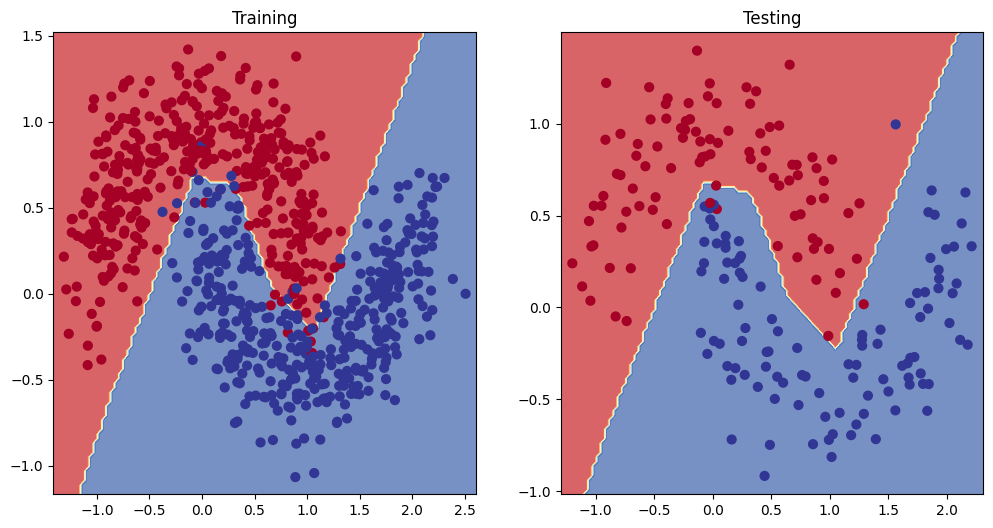

In [ ]:
plt.figure(figsize=(12, 6))
plt.subplot(1,2,1)
plt.title("Training")
plot_decision_boundary(model_7, X_train, y_train)

plt.subplot(1,2,2)
plt.title("Testing")
plot_decision_boundary(model_7, X_test, y_test)

In [ ]:
y_preds.shape, y_test.shape

(torch.Size([800]), torch.Size([200]))

In [ ]:
torch.manual_seed(42)

X_train, y_train = X_train.to(device), y_train.to(device)
X_test, y_test = X_test.to(device), y_test.to(device)
model_7.to(device)

with torch.inference_mode():
  y_logits = model_7(X_test).squeeze()

y_preds = torch.round(torch.sigmoid(y_logits))
accuracy(y_preds.cpu(), y_test.cpu())

tensor(0.9750)

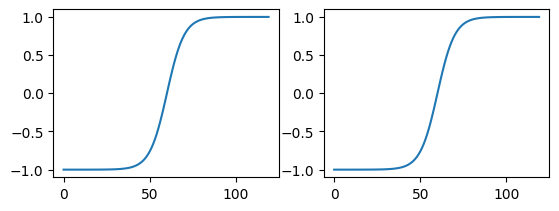

In [ ]:
def TanH(x: torch.tensor) -> torch.tensor:
  return (torch.exp(x) - torch.exp(-x)) / (torch.exp(x) + torch.exp(-x))

z = torch.arange(-6, 6, 0.1)

m = nn.Tanh()

plt.subplot(2,2,1)
plt.plot(TanH(z))
plt.subplot(2,2,2)
plt.plot(m(z))

## Practising multi-class classification

Dataset: https://cs231n.github.io/neural-networks-case-study/

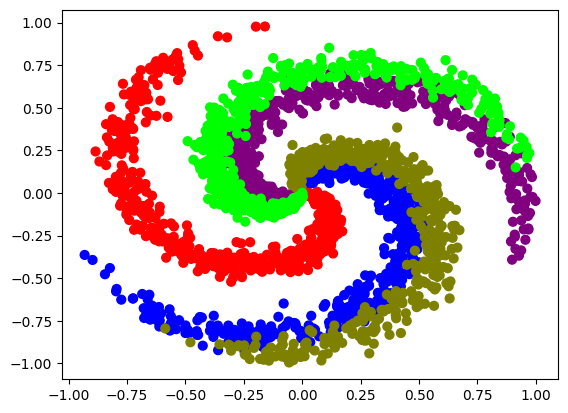

In [ ]:
# Code for creating a spiral dataset from CS231n
import numpy as np
N = 500 # number of points per class
D = 2 # dimensionality
K = 5 # number of classes
X_spiral = np.zeros((N*K,D)) # data matrix (each row = single example)
y_spiral = np.zeros(N*K, dtype='uint8') # class labels
for j in range(K):
  ix = range(N*j,N*(j+1))
  r = np.linspace(0.0,1,N) # radius
  t = np.linspace(j*4,(j+1)*4,N) + np.random.randn(N)*0.2 # theta
  X_spiral[ix] = np.c_[r*np.sin(t), r*np.cos(t)]
  y_spiral[ix] = j
# lets visualize the data
plt.scatter(X_spiral[:, 0], X_spiral[:, 1], c=y_spiral, s=40, cmap=plt.cm.brg)
plt.show()

In [ ]:
X_spiral.shape, y_spiral.shape

((2500, 2), (2500,))

In [ ]:
X_spiral[:5], y[:5]

(array([[-0.        ,  0.        ],
        [ 0.00058779,  0.00191587],
        [-0.0015252 ,  0.00370648],
        [ 0.00243147,  0.0054984 ],
        [-0.00187652,  0.0077933 ]]),
 tensor([0, 0, 0, 0, 0], dtype=torch.uint8))

In [ ]:
X_spiral = torch.from_numpy(X_spiral).type(torch.float32)
y_spiral = torch.from_numpy(y_spiral).type(torch.LongTensor)

In [ ]:
torch.unique(y_spiral)

tensor([0, 1, 2, 3, 4])

In [ ]:
X_spiral_train, X_spiral_test, y_spiral_train, y_spiral_test = train_test_split(X_spiral,
                                                                                y_spiral,
                                                                                test_size=0.2,
                                                                                random_state=42)

print(f"Shape of X_spiral_train: {X_spiral_train.shape}\tsize: {len(X_spiral_train)}")
print(f"Shape of y_spiral_train: {y_spiral_train.shape}\tsize: {len(y_spiral_train)}")

print(f"\nShape of X_spiral_test: {X_spiral_test.shape}\tsize: {len(X_spiral_test)}")
print(f"Shape of y_spiral_test: {y_spiral_test.shape}\tsize: {len(y_spiral_test)}")

Shape of X_spiral_train: torch.Size([2000, 2])	size: 2000
Shape of y_spiral_train: torch.Size([2000])	size: 2000

Shape of X_spiral_test: torch.Size([500, 2])	size: 500
Shape of y_spiral_test: torch.Size([500])	size: 500


In [ ]:
class SpiralClassificationModelv1(nn.Module):
  def __init__(self):
    super().__init__()

    self.layers = nn.Sequential(
      nn.Linear(in_features=2, out_features=16),
      nn.ReLU(),
      nn.Linear(in_features=16, out_features=48),
      nn.ReLU(),
      nn.Linear(in_features=48, out_features=64),
      nn.ReLU(),
      nn.Linear(in_features=64, out_features=128),
      nn.ReLU(),
      nn.Linear(in_features=128, out_features=256),
      nn.ReLU(),
      nn.Linear(in_features=256, out_features=128),
      nn.ReLU(),
      nn.Linear(in_features=128, out_features=64),
      nn.ReLU(),
      nn.Linear(in_features=64, out_features=48),
      nn.ReLU(),
      nn.Linear(in_features=48, out_features=16),
      nn.ReLU(),
      nn.Linear(in_features=16, out_features=5)
    )

  def forward(self, x: torch.tensor) -> torch.tensor:
    return self.layers(x)

model_8 = SpiralClassificationModelv1()
model_8

SpiralClassificationModelv1(
  (layers): Sequential(
    (0): Linear(in_features=2, out_features=16, bias=True)
    (1): ReLU()
    (2): Linear(in_features=16, out_features=48, bias=True)
    (3): ReLU()
    (4): Linear(in_features=48, out_features=64, bias=True)
    (5): ReLU()
    (6): Linear(in_features=64, out_features=128, bias=True)
    (7): ReLU()
    (8): Linear(in_features=128, out_features=256, bias=True)
    (9): ReLU()
    (10): Linear(in_features=256, out_features=128, bias=True)
    (11): ReLU()
    (12): Linear(in_features=128, out_features=64, bias=True)
    (13): ReLU()
    (14): Linear(in_features=64, out_features=48, bias=True)
    (15): ReLU()
    (16): Linear(in_features=48, out_features=16, bias=True)
    (17): ReLU()
    (18): Linear(in_features=16, out_features=5, bias=True)
  )
)

In [ ]:
model_8.to(device)

SpiralClassificationModelv1(
  (layers): Sequential(
    (0): Linear(in_features=2, out_features=16, bias=True)
    (1): ReLU()
    (2): Linear(in_features=16, out_features=48, bias=True)
    (3): ReLU()
    (4): Linear(in_features=48, out_features=64, bias=True)
    (5): ReLU()
    (6): Linear(in_features=64, out_features=128, bias=True)
    (7): ReLU()
    (8): Linear(in_features=128, out_features=256, bias=True)
    (9): ReLU()
    (10): Linear(in_features=256, out_features=128, bias=True)
    (11): ReLU()
    (12): Linear(in_features=128, out_features=64, bias=True)
    (13): ReLU()
    (14): Linear(in_features=64, out_features=48, bias=True)
    (15): ReLU()
    (16): Linear(in_features=48, out_features=16, bias=True)
    (17): ReLU()
    (18): Linear(in_features=16, out_features=5, bias=True)
  )
)

In [ ]:
spiral_loss = nn.CrossEntropyLoss()
spiral_optimizer = torch.optim.Adam(params=model_8.parameters(),
                                    lr=0.00001)

In [ ]:
X_spiral_test.dtype

torch.float32

In [ ]:
model_8.eval()

with torch.inference_mode():
  y_logits = model_8(X_spiral_test)

y_logits[:5] # these are the raw logits

tensor([[ 0.2562,  0.0703, -0.1244, -0.0359,  0.2094],
        [ 0.2560,  0.0701, -0.1244, -0.0360,  0.2093],
        [ 0.2560,  0.0701, -0.1244, -0.0360,  0.2093],
        [ 0.2560,  0.0701, -0.1244, -0.0360,  0.2093],
        [ 0.2560,  0.0701, -0.1244, -0.0360,  0.2093]])

In [ ]:
y_pred_probs = torch.softmax(y_logits, dim=1) # convert to prediction porbabilities
y_preds = torch.argmax(y_pred_probs, dim=1) # convert to predictions

In [ ]:
y_preds[:5]

tensor([0, 0, 0, 0, 0])

In [ ]:
torch.manual_seed(42)

epochs = 1000

X_spiral_train, X_spiral_test =  X_spiral_train.to(device), X_spiral_test.to(device)
y_spiral_train, y_spiral_test = y_spiral_train.to(device), y_spiral_test.to(device)
model_8.to(device)

for epoch in range(epochs):
  model_8.train()

  y_logits = model_8(X_spiral_train)
  y_preds = torch.softmax(y_logits, dim=1).argmax(dim=1)

  loss = spiral_loss(y_logits, y_spiral_train)
  acc = accuracy_fn(y_true=y_spiral_train,
                    y_pred=y_preds)

  spiral_optimizer.zero_grad()
  loss.backward()
  spiral_optimizer.step()

  model_8.eval()
  with torch.inference_mode():
    test_logits = model_8(X_spiral_test)
    test_preds = torch.softmax(test_logits, dim=1).argmax(dim=1)

    test_loss = spiral_loss(test_logits, y_spiral_test)
    test_acc = accuracy_fn(y_true=y_spiral_test,
                           y_pred=test_preds)

  if epoch % 100 == 0:
    print(f"Epoch: {epoch} | Loss: {loss:.4f}, Acc: {acc:.2f}% | Test loss: {test_loss:.4f}, Test Acc: {test_acc:.2f}%")


Epoch: 0 | Loss: 0.1277, Acc: 94.55% | Test loss: 0.1686, Test Acc: 94.80%
Epoch: 100 | Loss: 0.1276, Acc: 94.55% | Test loss: 0.1683, Test Acc: 94.60%
Epoch: 200 | Loss: 0.1275, Acc: 94.65% | Test loss: 0.1689, Test Acc: 94.80%
Epoch: 300 | Loss: 0.1274, Acc: 94.55% | Test loss: 0.1691, Test Acc: 94.60%
Epoch: 400 | Loss: 0.1272, Acc: 94.60% | Test loss: 0.1696, Test Acc: 94.80%
Epoch: 500 | Loss: 0.1271, Acc: 94.60% | Test loss: 0.1698, Test Acc: 94.80%
Epoch: 600 | Loss: 0.1270, Acc: 94.60% | Test loss: 0.1703, Test Acc: 94.80%
Epoch: 700 | Loss: 0.1269, Acc: 94.60% | Test loss: 0.1706, Test Acc: 94.60%
Epoch: 800 | Loss: 0.1268, Acc: 94.60% | Test loss: 0.1713, Test Acc: 94.60%
Epoch: 900 | Loss: 0.1267, Acc: 94.60% | Test loss: 0.1714, Test Acc: 94.80%


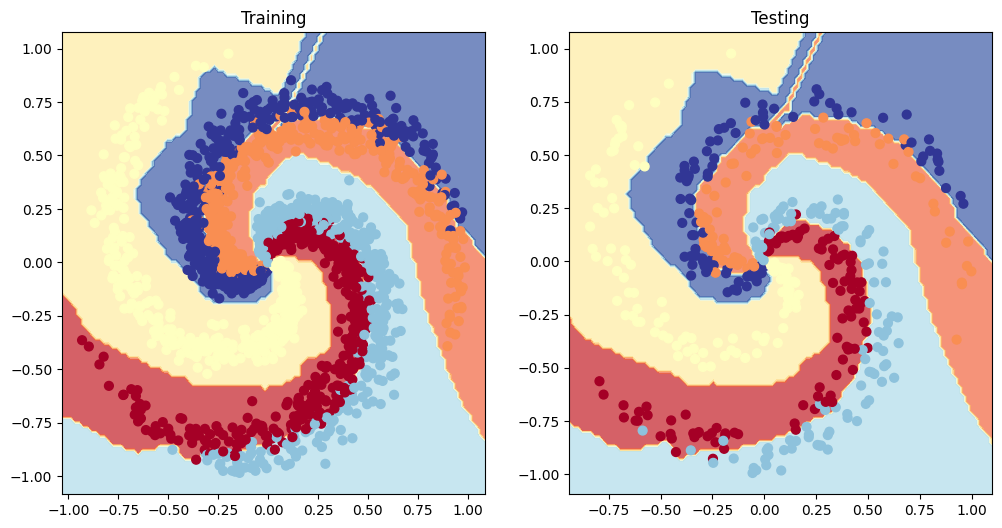

In [ ]:
plt.figure(figsize=(12,6))
plt.subplot(1,2,1)
plt.title("Training")
plot_decision_boundary(model_8, X_spiral_train, y_spiral_train)

plt.subplot(1,2,2)
plt.title("Testing")
plot_decision_boundary(model_8, X_spiral_test, y_spiral_test)

In [ ]:
f